# Task 1: Data Preparation (Primary.csv only, the others are prepared for tasks)

In [1]:
import pandas as pd
primary_filepathog = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/Primary.csv'
pogdf = pd.read_csv(primary_filepathog, encoding='latin1')

In [2]:
pogdf.head()

,column A,column B,column C,column D,column E,column F,column G,column H,column I,column J,column K,column L
0,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
1,AGO,Angola,SSA,ESA,Lower middle income (LM),15%,2%,22%,0%,61%,Demographic and Health Survey,2015-16
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),39%,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,69%,89%,46%,99%,Demographic and Health Survey,2015-16
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34%,30%,49%,7%,75%,Multiple Indicator Cluster Survey,2019


In [3]:
pogdf.isnull().any()

column A     False
column B     False
column C     False
column  D    False
column E     False
column F     False
column G      True
column H      True
column I      True
column J      True
column K     False
column L     False
dtype: bool

In [4]:
duplicates = pogdf.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [5]:
#now that we know which columns have missing values, I want to check how many missing values are there per column
missing_values = pogdf.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 column A      0
column B      0
column C      0
column  D     0
column E      0
column F      0
column G     11
column H      8
column I     18
column J     21
column K      0
column L      0
dtype: int64


In [6]:
#here is how I will be cleaning the data
#first I will pull the csv into a dataframe
#i till skip the first row as it is just the columns by letters which isn't the most convenient
#to remember or analyze

file_path_test = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/Primary.csv'
dftest = pd.read_csv(file_path_test, skiprows=1)

output_file_path_test = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/cleanedprimary.csv'
dftest.to_csv(output_file_path_test, index=False)
dftest.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),15%,2%,22%,0%,61%,Demographic and Health Survey,2015-16
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),39%,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,69%,89%,46%,99%,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),34%,30%,49%,7%,75%,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),63%,54%,68%,9%,97%,Multiple Indicator Cluster Survey,2012


In [7]:
import numpy as np

file_path_test = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/Primary.csv'
dftest = pd.read_csv(file_path_test, skiprows=1)

# Function for converting the percentage string value to float
def percentage_to_float(x):
    if isinstance(x, str) and x.endswith('%'):
        return float(x[:-1]) / 100
    return x

# Converting the string percentage values to float
cols_to_convert = ['Total', 
                   'Rural (Residence)', 
                   'Urban (Residence)', 
                   'Poorest (Wealth quintile)', 
                   'Richest (Wealth quintile)']
for col in cols_to_convert:
    dftest[col] = dftest[col].apply(percentage_to_float)

# Replacing the empty 'NaN' values in 'Rural (Residence)' and 'Urban (Residence)' 
#columns with the mean of other non-empty countries in the same 'Region'
cols_to_fill = ['Rural (Residence)', 
                'Urban (Residence)',
                'Poorest (Wealth quintile)', 
                'Richest (Wealth quintile)']

for col in cols_to_fill:
    dftest[col] = dftest.groupby('Region')[col].apply(lambda x: x.fillna(round(x.mean(), 2)))

output_file_path_test = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/cleanedprimary.csv'
dftest.to_csv(output_file_path_test, index=False)
dftest.head()


,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15,0.02,0.22,0.00,0.61,Demographic and Health Survey,2015-16
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.39,0.26,0.47,0.22,0.80,Multiple Indicator Cluster Survey,2011-12
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.69,0.89,0.46,0.99,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34,0.30,0.49,0.07,0.75,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.63,0.54,0.68,0.09,0.97,Multiple Indicator Cluster Survey,2012


In [8]:
#using regex to handle the 'Time period' values in the last column
#basically to ensure all he values in the column are in the 2010's
import re

def handle_time_period(value):
    # Case 1: If format is like '2015-16' or '2011-12'
    if re.match(r'\d{4}-\d{2}', value):
        return value[:2] + value[-2:]
    
    # Case 2: If the value is something outlandish like '2562'
    if int(value) > 2019 or int(value) < 2010:
        return '20' + value[-2:]
    
    # Case 3: If the value is like '2027'
    if int(value) > 2019:
        return '201' + value[-1]
    
    # Case 4: If the value is like '2012-99'
    if re.match(r'\d{4}-\d{2}', value) and int(value[-2:]) > 19:
        return '20' + value[-2:]
    
    # Case 5: If the value is like '2018-2019'
    if re.match(r'\d{4}-\d{4}', value):
        return value[-4:]
    
    # Case 6: If the value is like '2076'
    if int(value) > 2019 and int(value[-1]) > 0:
        return '20' + value[-1]  
    
    return value

# Applying the function to the 'Time period' column
dftest['Time period'] = dftest['Time period'].apply(handle_time_period)

output_file_path_test = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/cleanedprimary.csv'
dftest.to_csv(output_file_path_test, index=False)

dftest.head(59)


,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15,0.02,0.22,0.00,0.61,Demographic and Health Survey,2016
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.39,0.26,0.47,0.22,0.80,Multiple Indicator Cluster Survey,2012
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.69,0.89,0.46,0.99,Demographic and Health Survey,2016
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34,0.30,0.49,0.07,0.75,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.63,0.54,0.68,0.09,0.97,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),0.03,0.01,0.06,0.00,0.14,Demographic and Health Survey,2018
6,BOL,Bolivia (Plurinational State of),LAC,LAC,Lower middle income (LM),0.11,0.04,0.15,0.22,0.80,EDSA,2016
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),0.51,0.43,0.68,0.03,0.95,Multiple Indicator Cluster Survey,2012
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),0.82,0.49,0.88,0.86,1.00,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),0.73,0.65,0.77,0.24,0.98,Bulgarian Longitudinal Inclusive Society Surve...,2013


In [9]:
#I am removing the following columns as I feel they aren't relevant to the analysis I want to conduct
columns_to_remove1 = ['Rural (Residence)','Urban (Residence)','Poorest (Wealth quintile)', 'Richest (Wealth quintile)', 'Data source', 'Time period']
dftest = dftest.drop(columns=columns_to_remove1)
dftest.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.39
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34
4,BRB,Barbados,LAC,LAC,High income (H),0.63


In [10]:
#now that I have the dataset I wanted, i will convert the string values into floats
#this will allow me to analyze the data numerically

def percentage_to_float(value):
    if isinstance(value, str) and value.endswith('%'):
        return float(value[:-1]) / 100
    else:
        return value

columns_to_convert = ['Total']

for column in columns_to_convert:
    dftest[column] = dftest[column].apply(percentage_to_float)

dftest.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.39
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34
4,BRB,Barbados,LAC,LAC,High income (H),0.63


# Task 2.1: I am choosing the following: 
Nominal Value: 'Region;
Ordinal Value: 'Income Group';
Numerical Value: 'Total';

In [11]:
#my data is now cleaned as I have the rows that I want to analyze
import seaborn as sns
import matplotlib.pyplot as plt

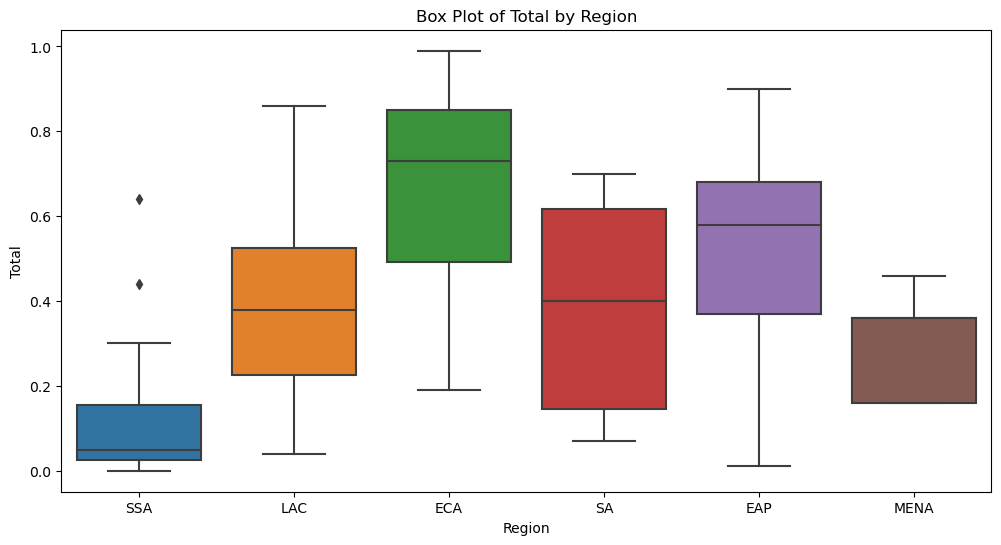

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total', data=dftest)
plt.title('Box Plot of Total by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()

In [13]:
#As we can witness, there are outliers on the 'SSA' region

def detect_outliers(region_df):
    Q1 = region_df['Total'].quantile(0.25)
    Q3 = region_df['Total'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = region_df[(region_df['Total'] < lower_bound) | (region_df['Total'] > upper_bound)]
    return outliers

region_groups = dftest.groupby('Region')

outliers = pd.concat([detect_outliers(group) for _, group in region_groups])

outliers.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
25,GMB,Gambia,SSA,WCA,Low income (L),0.64
60,STP,Sao Tome and Principe,SSA,WCA,Lower middle income (LM),0.44


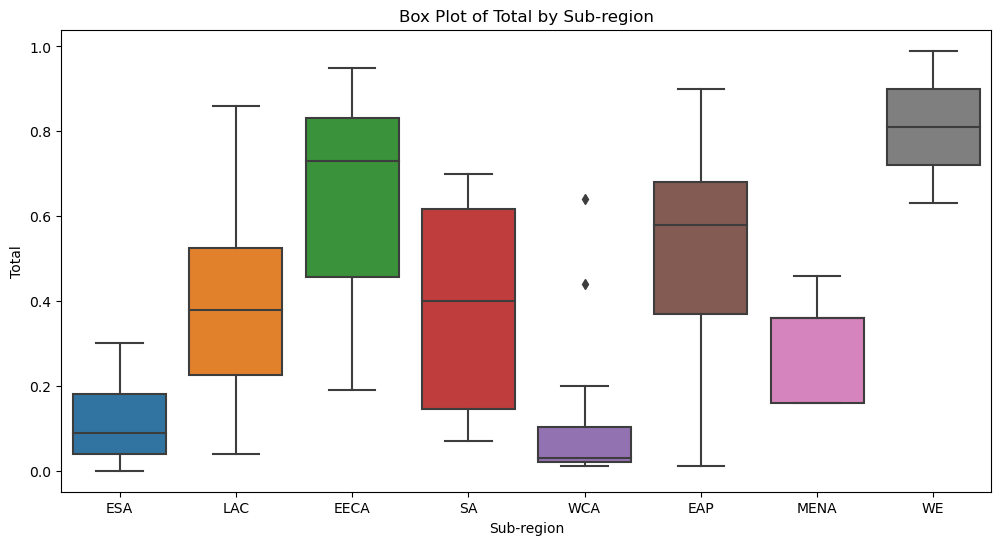

In [14]:
#I want to explore and analyze these so we can make a good inference as to what makes them special
#To do this, I am going to visualize a similar boxplot, with the Sub-region and Total 
#my reasoning for this is that maybe Sub-region migh be a better predictor of the Total than the Region
# and Income Group

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-region', y='Total', data=dftest)
plt.title('Box Plot of Total by Sub-region')
plt.xlabel('Sub-region')
plt.ylabel('Total')
plt.show()

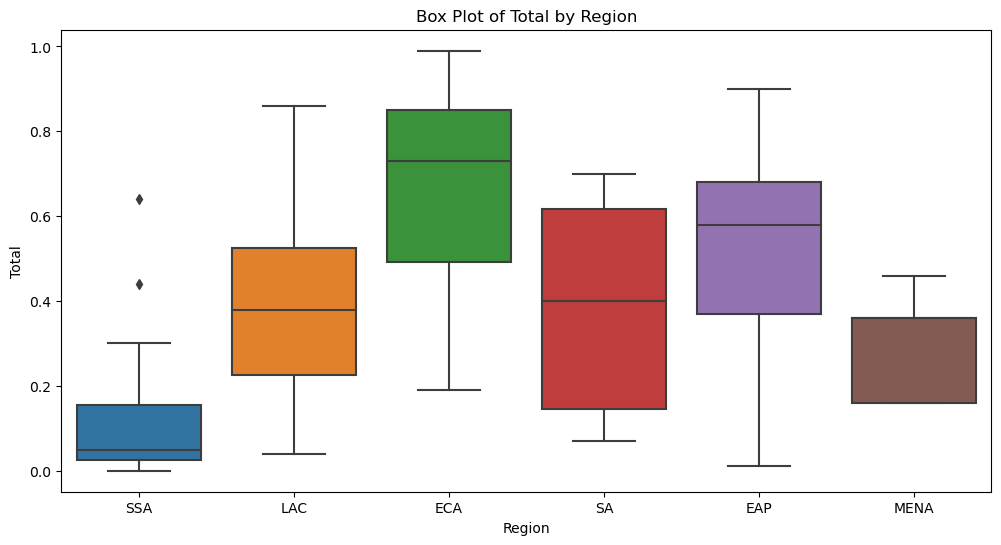

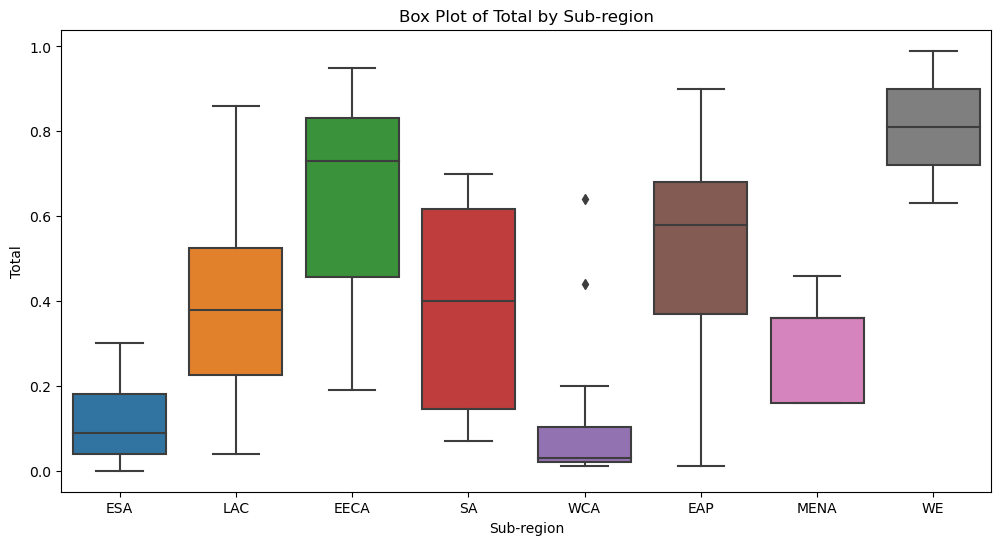

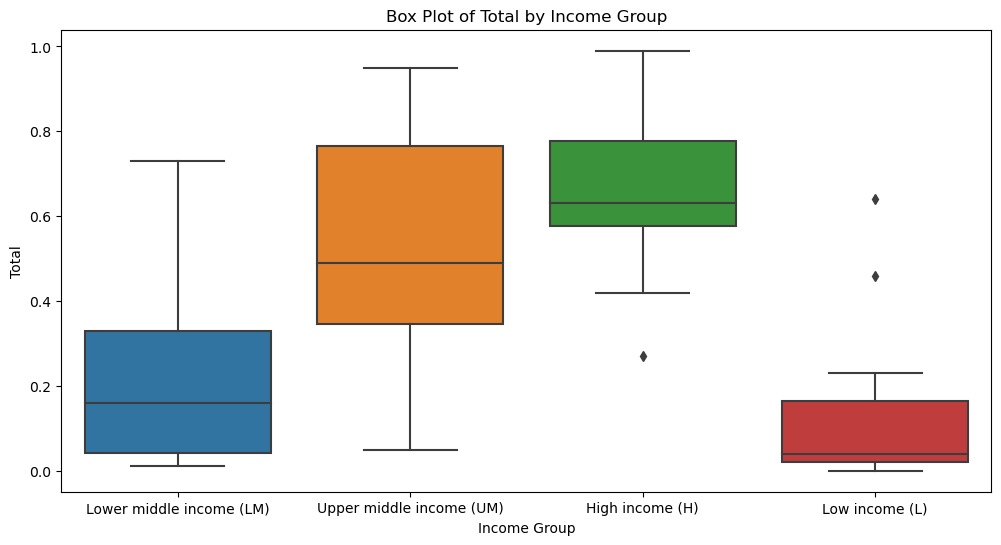

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total', data=dftest)
plt.title('Box Plot of Total by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-region', y='Total', data=dftest)
plt.title('Box Plot of Total by Sub-region')
plt.xlabel('Sub-region')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Income Group', y='Total', data=dftest)
plt.title('Box Plot of Total by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total')
plt.show()

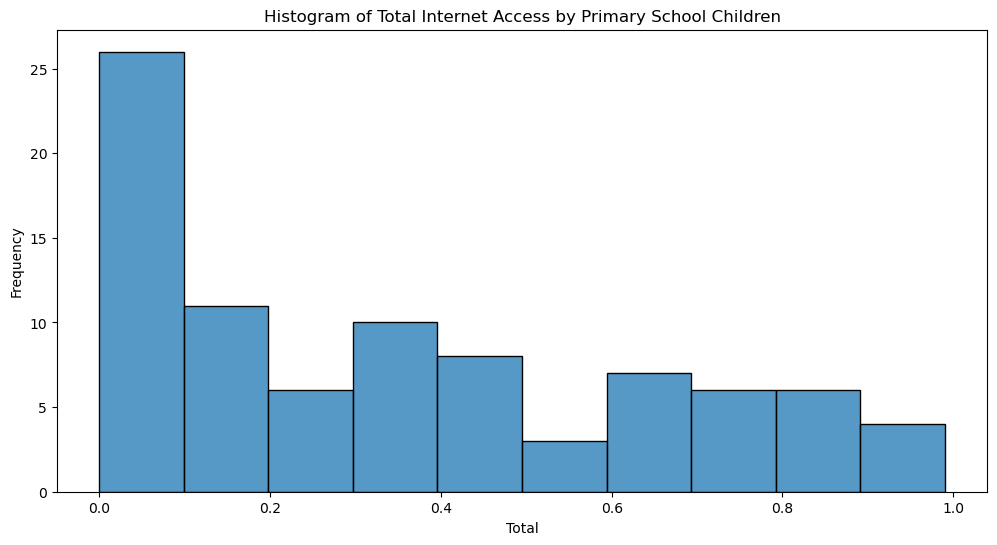

In [16]:
#I wanted to see he spread of data across the Primary school children data
#for this, I employed a Histogram
#as we can see, most of the data is aggregated towards only 1% of of primary schoolchildren having
#internet access


plt.figure(figsize=(12, 6))
sns.histplot(data=dftest, x='Total', bins=10)
plt.title('Histogram of Total Internet Access by Primary School Children')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()


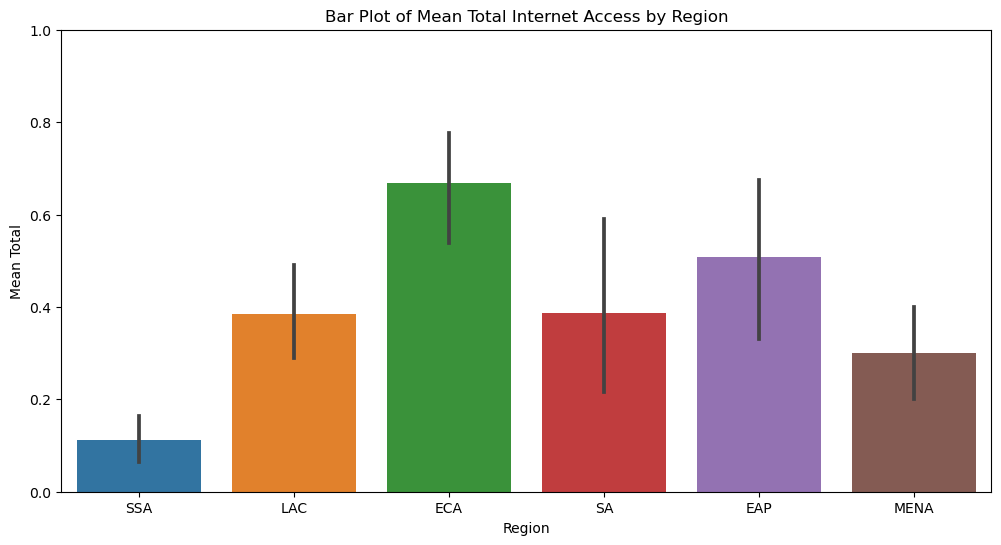

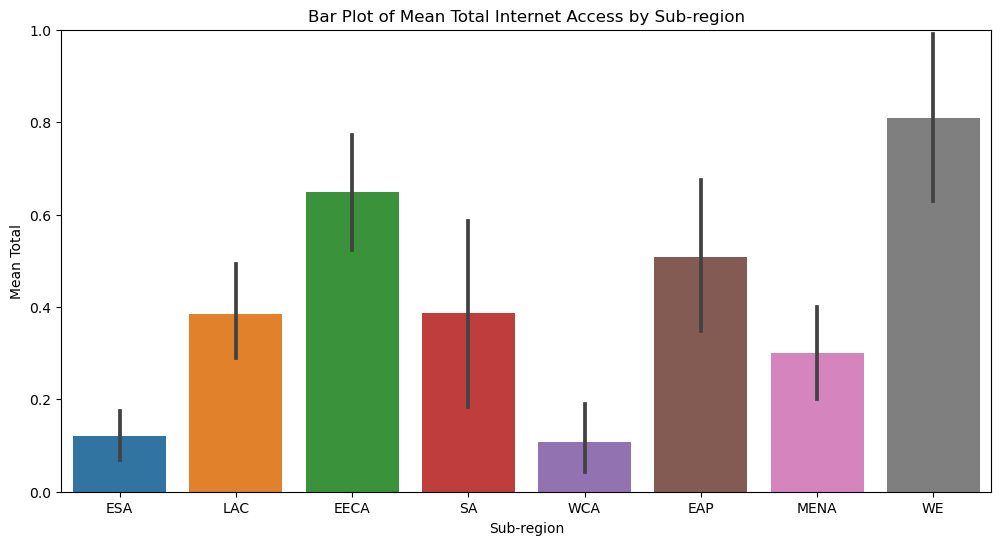

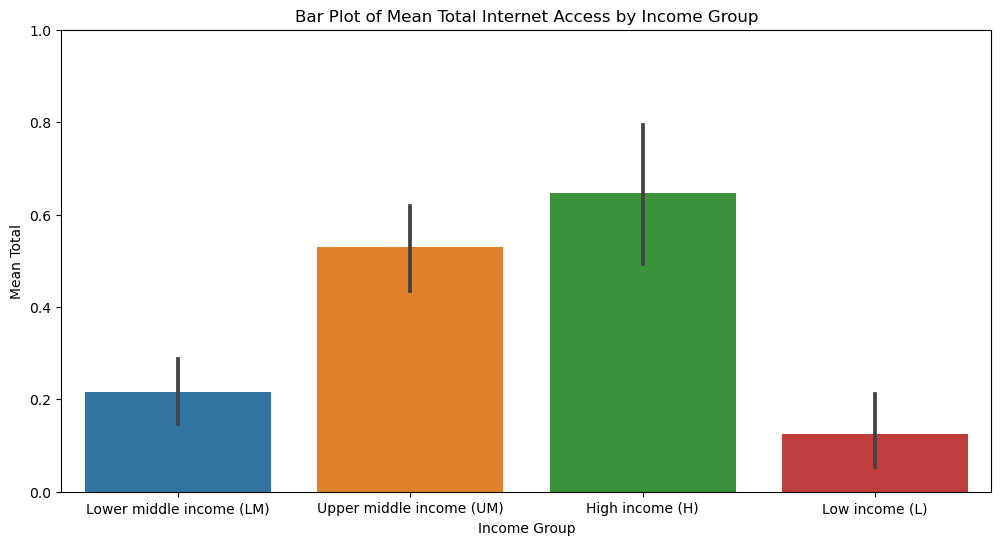

In [17]:
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='Region', y='Total', data=dftest)
plt.title('Bar Plot of Mean Total Internet Access by Region')
plt.xlabel('Region')
plt.ylabel('Mean Total')

# Setting the y-axis range from 0 to 1 to accomodate percent values
ax1.set_ylim(0, 1)

plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='Sub-region', y='Total', data=dftest)
plt.title('Bar Plot of Mean Total Internet Access by Sub-region')
plt.xlabel('Sub-region')
plt.ylabel('Mean Total')

ax2.set_ylim(0, 1)

plt.show()

plt.figure(figsize=(12, 6))
ax3 = sns.barplot(x='Income Group', y='Total', data=dftest)
plt.title('Bar Plot of Mean Total Internet Access by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Mean Total')

ax3.set_ylim(0, 1)

plt.show()


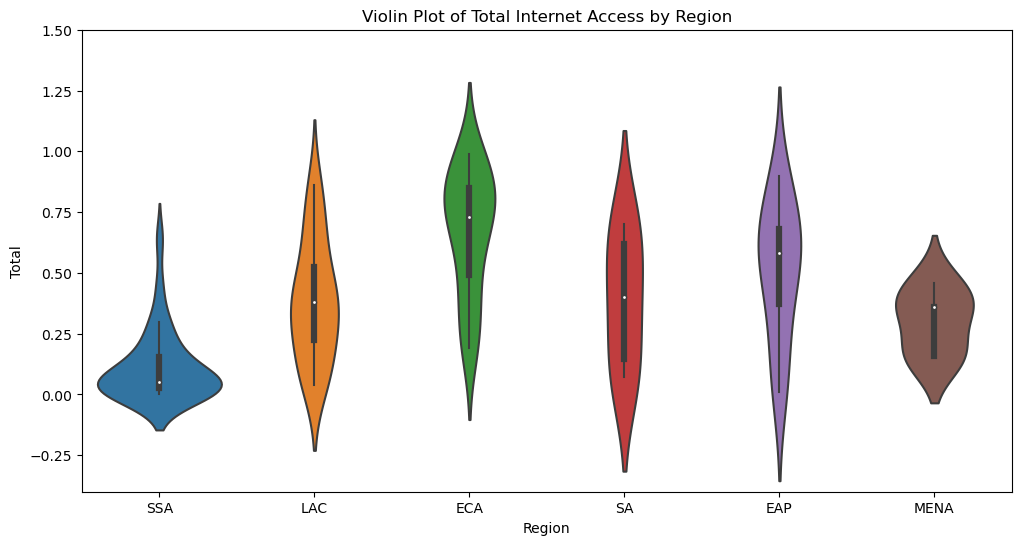

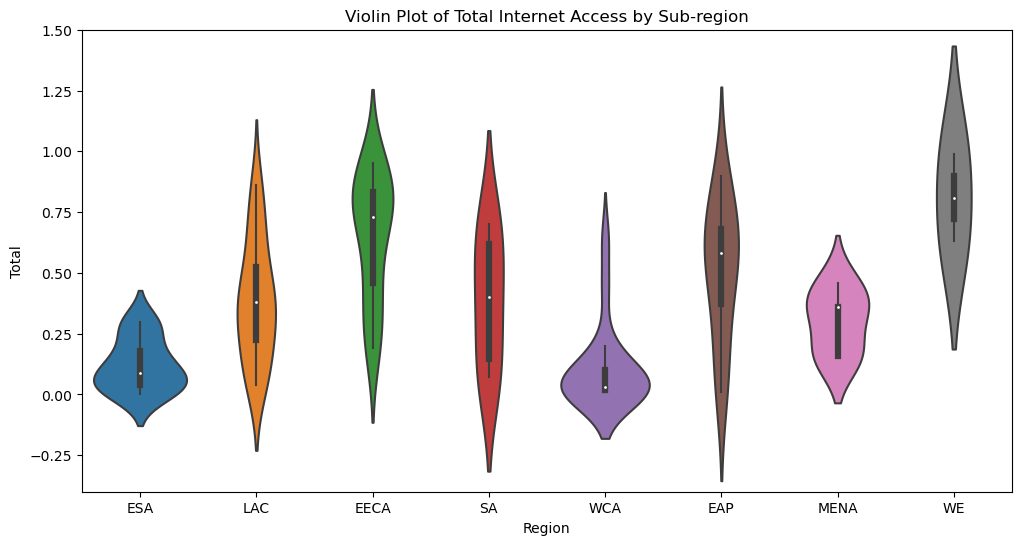

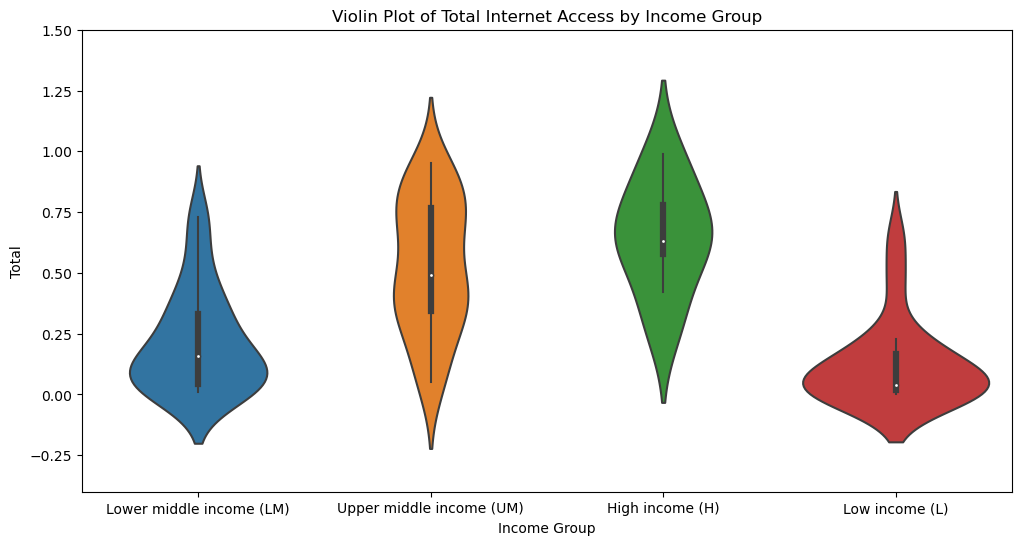

In [18]:
plt.figure(figsize=(12, 6))
ax1 = sns.violinplot(x='Region', y='Total', data=dftest)
plt.title('Violin Plot of Total Internet Access by Region')
plt.xlabel('Region')
plt.ylabel('Total')

# Settting the y-axis range from -0.30 to 1.50 to accomodate the full violin plot
ax1.set_ylim(-0.40, 1.50)

plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.violinplot(x='Sub-region', y='Total', data=dftest)
plt.title('Violin Plot of Total Internet Access by Sub-region')
plt.xlabel('Region')
plt.ylabel('Total')

ax2.set_ylim(-0.40, 1.50)

plt.show()

plt.figure(figsize=(12, 6))
ax3 = sns.violinplot(x='Income Group', y='Total', data=dftest)
plt.title('Violin Plot of Total Internet Access by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total')

ax3.set_ylim(-0.40, 1.50)

plt.show()


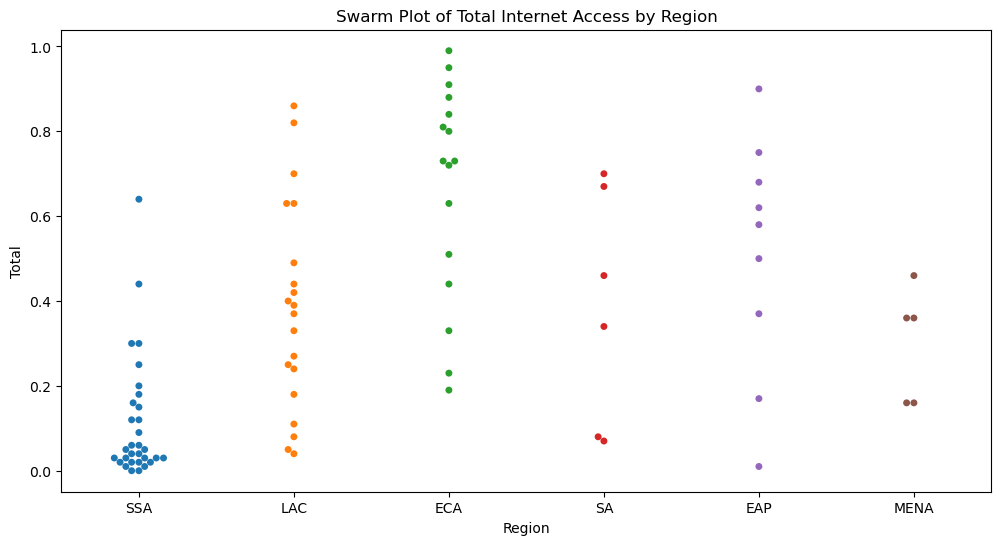

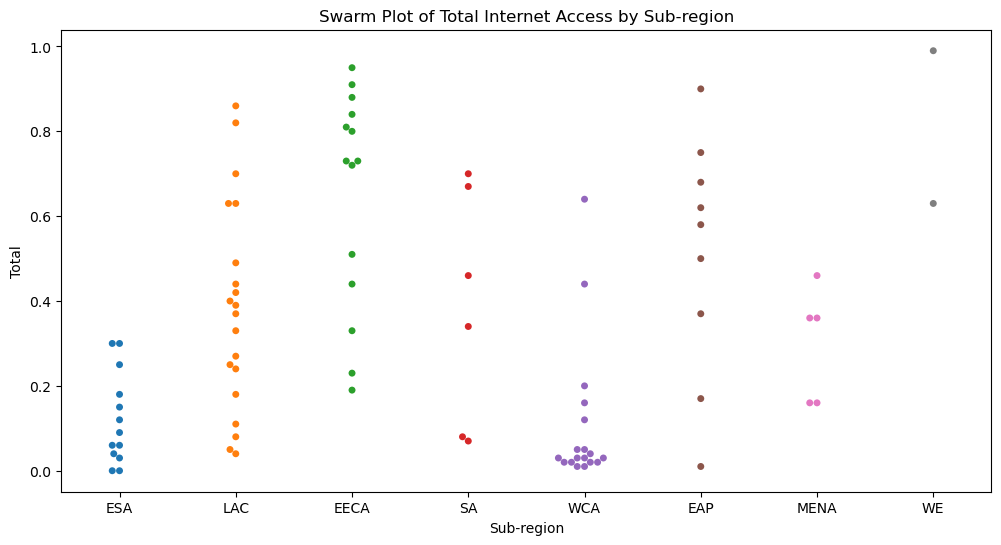

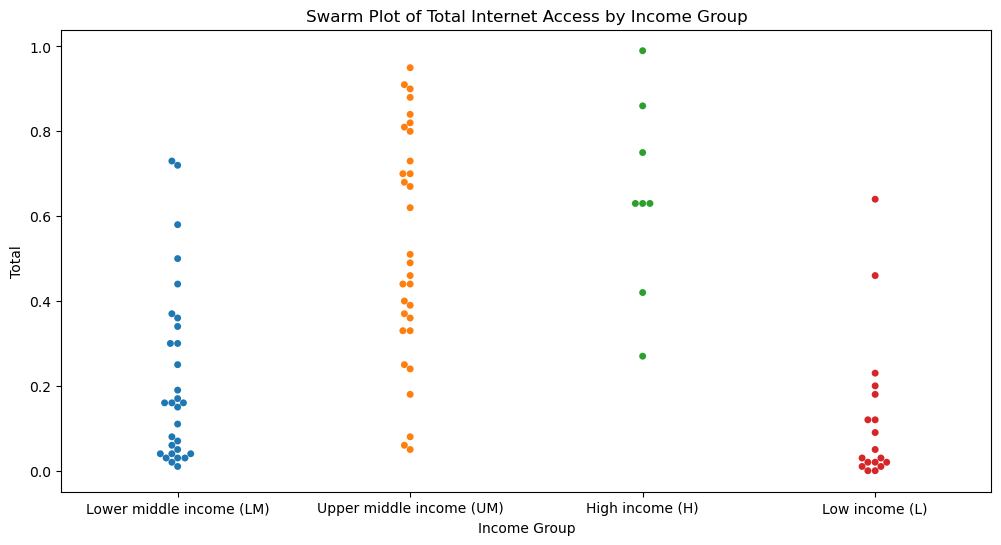

In [19]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Region', y='Total', data=dftest)
plt.title('Swarm Plot of Total Internet Access by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Sub-region', y='Total', data=dftest)
plt.title('Swarm Plot of Total Internet Access by Sub-region')
plt.xlabel('Sub-region')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Income Group', y='Total', data=dftest)
plt.title('Swarm Plot of Total Internet Access by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total')
plt.show()

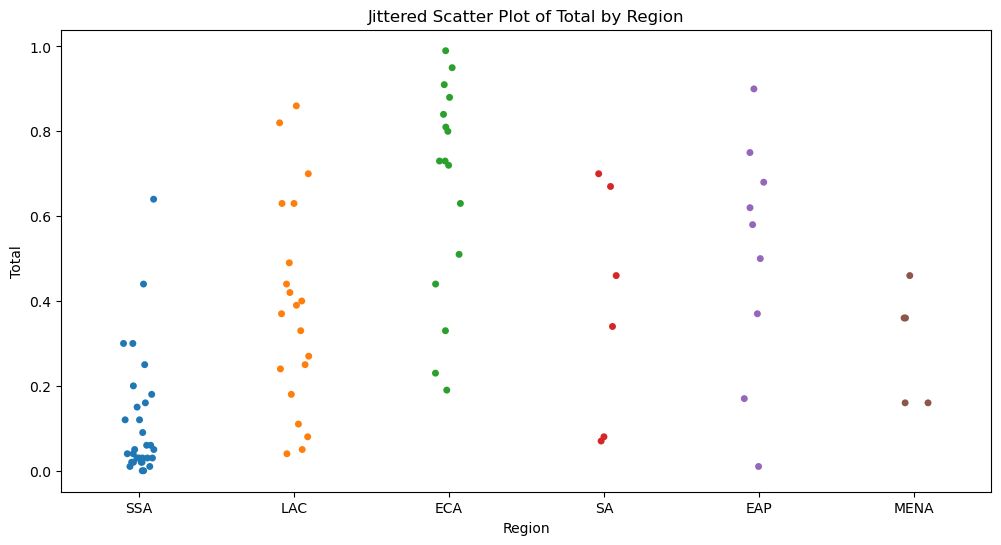

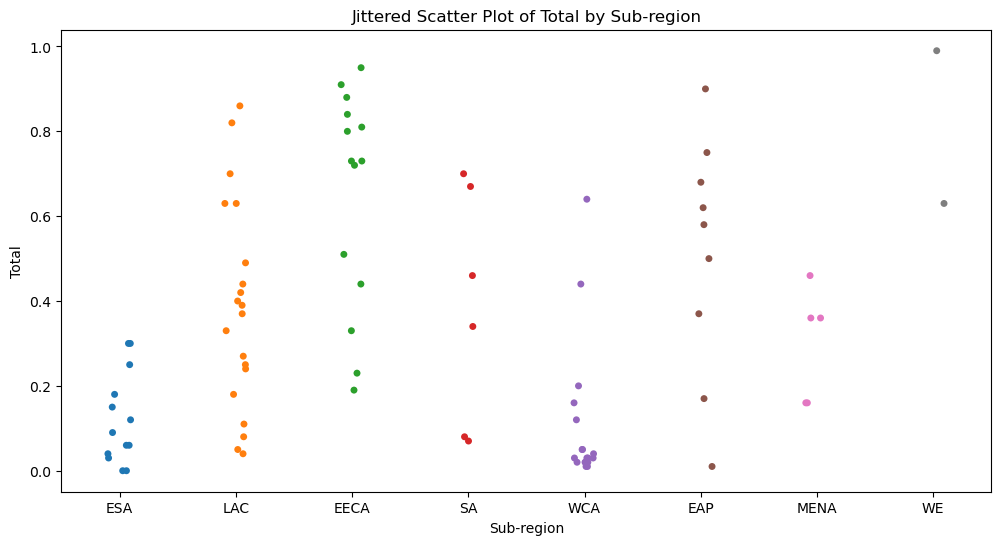

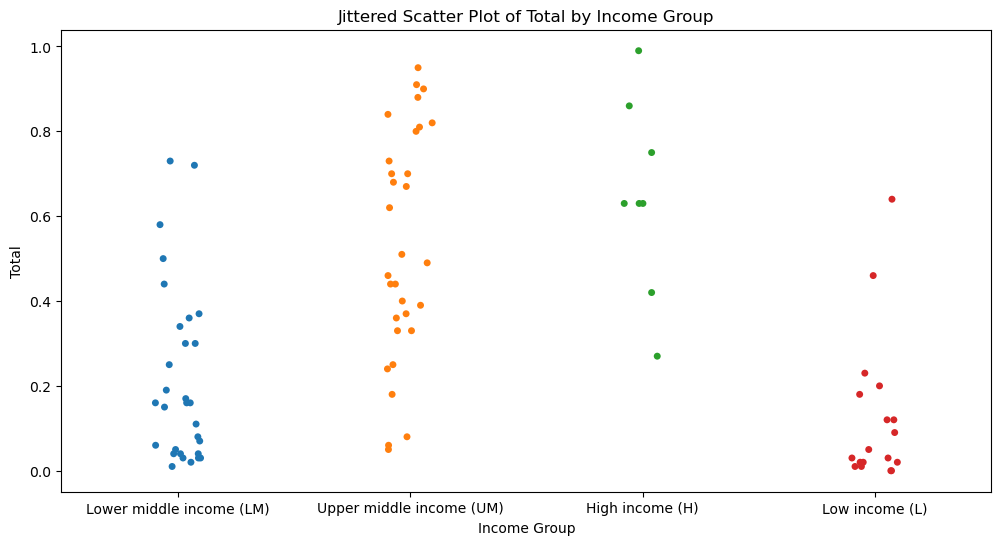

In [20]:
#I am using a Jittered Plot to see a messier version of the swarm plot so i can get
#an idea of how much variation there is in between the data


plt.figure(figsize=(12, 6))
sns.stripplot(x='Region', y='Total', data=dftest, jitter=True, edgecolor='gray')
plt.title('Jittered Scatter Plot of Total by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(12, 6))
sns.stripplot(x='Sub-region', y='Total', data=dftest, jitter=True, edgecolor='gray')
plt.title('Jittered Scatter Plot of Total by Sub-region')
plt.xlabel('Sub-region')
plt.ylabel('Total')
plt.show()

plt.figure(figsize=(12, 6))
sns.stripplot(x='Income Group', y='Total', data=dftest, jitter=True, edgecolor='gray')
plt.title('Jittered Scatter Plot of Total by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total')
plt.show()


# Task 1: ANOVA ANALYSIS FOR NUMERICAL VALUE SUBSTITUTION
Here, I am evaluating the effectiveness of 'Total', 'Region', and 'Income Group' by virtue of their 'Total' value predictive power

In [21]:
#anova analysis to determine which is a better predictor of 'Total', 'Region', 'Sub-region' or 'Income Group'

from scipy.stats import f_oneway

# ANOVA calculation for 'Region' and 'Total'
region_groups = dftest.groupby('Region')['Total'].apply(list)
region_anova_results = f_oneway(*region_groups)
print(f"Region - F statistic: {region_anova_results.statistic:.2f}, P-value: {region_anova_results.pvalue:.5f}")

#'Sub-region' and 'Total'
sub_region_groups = dftest.groupby('Sub-region')['Total'].apply(list)
sub_region_anova_results = f_oneway(*sub_region_groups)
print(f"Sub-region - F statistic: {sub_region_anova_results.statistic:.2f}, P-value: {sub_region_anova_results.pvalue:.5f}")

#'Income Group' and 'Total'
income_group_groups = dftest.groupby('Income Group')['Total'].apply(list)
income_group_anova_results = f_oneway(*income_group_groups)
print(f"Income Group - F statistic: {income_group_anova_results.statistic:.2f}, P-value: {income_group_anova_results.pvalue:.5f}")


Region - F statistic: 15.30, P-value: 0.00000
Sub-region - F statistic: 10.93, P-value: 0.00000
Income Group - F statistic: 20.17, P-value: 0.00000


In [22]:
#eta squared test to determine prediction and effective power of a categorical variable on Total
def eta_squared(f_statistic, df_between, df_within):
    return f_statistic * df_between / (f_statistic * df_between + df_within)

region_eta_squared = eta_squared(region_anova_results.statistic, len(region_groups) - 1, len(dftest) - len(region_groups))
income_group_eta_squared = eta_squared(income_group_anova_results.statistic, len(income_group_groups) - 1, len(dftest) - len(income_group_groups))
sub_region_eta_squared = eta_squared(sub_region_anova_results.statistic, len(sub_region_groups) - 1, len(dftest) - len(sub_region_groups))


print(f"Region - Eta-squared: {region_eta_squared:.4f}")
print(f"Income Group - Eta-squared: {income_group_eta_squared:.4f}")
print(f"Sub-region - Eta-squared: {sub_region_eta_squared:.4f}")


Region - Eta-squared: 0.4857
Income Group - Eta-squared: 0.4216
Sub-region - Eta-squared: 0.4921


In [23]:
#from the above Eta-squared value, We have inferred that the Sub-region is the best predictor of
#'total' percent of children, however, I want to undersand how feasible this is to be able to apply 
#as a substitute for the mean if one seems o be missing, given this need, I feel I will use the 'Region'
#if in case, I want to compute and substitute a value for a missing value in a region

region_counts = dftest['Region'].value_counts()
print("Region Counts:")
print(region_counts)

subregion_counts = dftest['Sub-region'].value_counts()
print("\nSub-region Counts:")
print(subregion_counts)

income_group_counts = dftest['Income Group'].value_counts()
print("\nIncome Group Counts:")
print(income_group_counts)


Region Counts:
SSA     31
LAC     20
ECA     16
EAP      9
SA       6
MENA     5
Name: Region, dtype: int64

Sub-region Counts:
LAC     20
WCA     18
EECA    14
ESA     13
EAP      9
SA       6
MENA     5
WE       2
Name: Sub-region, dtype: int64

Income Group Counts:
Upper middle income (UM)    31
Lower middle income (LM)    30
Low income (L)              18
High income (H)              8
Name: Income Group, dtype: int64


# Task 2.2: Total School Age.csv data preparation and visualization
In this section, I will clean and substitute the missing values in the Total School Age csv 
I will employ the same methods that I used for preparing Primary.csv in Task 1

In [24]:
file_path3 = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/Total School Age.csv'

In [25]:
df3 = pd.read_csv(file_path3, encoding='latin1')

In [26]:
df3.describe()

,column A,column B,column C,column D,column E,column F,column G,column H,column I,column J,column K,column L
count,88,88,88,88,88,88,78,81,71,70,88,88
unique,88,88,7,9,6,59,40,56,34,45,27,21
top,ISO3,Countries and areas,SSA,LAC,Upper middle income (UM),3%,1%,52%,0%,99%,Multiple Indicator Cluster Survey,2018
freq,1,1,31,20,32,5,12,4,24,6,45,16


In [27]:
duplicates3 = df3.duplicated()
print(f"Number of duplicate rows: {duplicates3.sum()}")

Number of duplicate rows: 0


In [28]:
df_transposed3 = df3.T
duplicates3 = df_transposed3.duplicated()
print(f"Number of duplicate columns: {duplicates3.sum()}")
duplicate_column_names3 = df_transposed3.index[duplicates3].tolist()
print("Duplicate column names:", duplicate_column_names3)

Number of duplicate columns: 0
Duplicate column names: []


In [29]:
df3.isnull().any()

column A     False
column B     False
column C     False
column  D    False
column E     False
column F     False
column G      True
column H      True
column I      True
column J      True
column K     False
column L     False
dtype: bool

In [30]:
df3.isnull().sum()

column A      0
column B      0
column C      0
column  D     0
column E      0
column F      0
column G     10
column H      7
column I     17
column J     18
column K      0
column L      0
dtype: int64

In [31]:
#removing the first 'column' row
file_path_test3 = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/Total School Age.csv'
dftest3 = pd.read_csv(file_path_test3, skiprows=1)
output_file_path_test3 = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/precleaned_total_school_age.csv'
dftest3.to_csv(output_file_path_test3, index=False)
dftest3.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),24%,9%,32%,1%,77%,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),17%,2%,24%,0%,62%,Demographic and Health Survey,2015-16
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),40%,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,71%,88%,47%,99%,Demographic and Health Survey,2015-16
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),37%,33%,52%,9%,76%,Multiple Indicator Cluster Survey,2019


In [32]:
#printing out every single row with missing values in the School Age Dataset
missing_values_df_test3 = dftest3.loc[dftest3['Rural (Residence)'].isnull() | dftest3['Urban (Residence)'].isnull() | dftest3['Poorest (Wealth quintile)'].isnull() | dftest3['Richest (Wealth quintile)'].isnull()]

In [33]:
missing_values_df_test3.head(100)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),40%,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
7,BOL,Bolivia (Plurinational State of),LAC,LAC,Lower middle income (LM),12%,4%,17%,NaN,NaN,EDSA,2016
16,CHN,China,EAP,EAP,Upper middle income (UM),57%,50%,91%,NaN,90%,CHARLS,2018
24,ECU,Ecuador,LAC,LAC,Upper middle income (UM),42%,20%,53%,NaN,NaN,ENSANUT,2018
25,EGY,Egypt,MENA,MENA,Lower middle income (LM),17%,9%,29%,NaN,NaN,"2015 Household Income, Expenditure and Consump...",2015
37,KEN,Kenya,SSA,ESA,Lower middle income (LM),32%,NaN,24%,NaN,NaN,STEP Skills Measurement Household Survey 2013 ...,2013
46,MEX,Mexico,LAC,LAC,Upper middle income (UM),41%,11%,52%,NaN,NaN,ENSANUT,2018
49,MAR,Morocco,MENA,MENA,Lower middle income (LM),18%,12%,23%,NaN,NaN,Morocco Household and Youth Survey 2010,2010
52,NIC,Nicaragua,LAC,LAC,Lower middle income (LM),4%,NaN,NaN,NaN,NaN,Nicaragua National Demographic and Health Surv...,2011-12
53,NER,Niger,SSA,WCA,Low income (L),3%,NaN,NaN,NaN,NaN,National Survey on Household Living Conditions...,2014-15


In [34]:
#I am going to be choosing Rural (Residence), and Urban (Residence) for analysis in the second question
#for this, like I did for task 1, I will be converting the % string values to float

def percentage_to_float(value):
    if isinstance(value, str) and value.endswith('%'):
        return float(value[:-1]) / 100
    else:
        return value

columns_to_convert = ['Total', 'Rural (Residence)', 'Urban (Residence)']

for column in columns_to_convert:
    dftest3[column] = dftest3[column].apply(percentage_to_float)

#removing unwanted last four columns
#columns_to_remove = ['Poorest (Wealth quintile)', 'Richest (Wealth quintile)', 'Data source', 'Time period']
#dftest3 = dftest3.drop(columns=columns_to_remove)

dftest3.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.24,0.09,0.32,1%,77%,Multiple Indicator Cluster Survey,2018-19
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.17,0.02,0.24,0%,62%,Demographic and Health Survey,2015-16
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.40,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.71,0.88,47%,99%,Demographic and Health Survey,2015-16
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.37,0.33,0.52,9%,76%,Multiple Indicator Cluster Survey,2019


In [35]:
columns_to_remove = ['Poorest (Wealth quintile)', 'Richest (Wealth quintile)', 'Data source', 'Time period']
dftest3 = dftest3.drop(columns=columns_to_remove)
dftest3.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence)
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.24,0.09,0.32
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.17,0.02,0.24
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.40,NaN,NaN
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.71,0.88
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.37,0.33,0.52


In [36]:
file_path = "/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/schoolagecleaned.csv"
dftest3.to_csv(file_path, index=False)

In [37]:

file_path = "/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/schoolagecleaned.csv"
dftest3cleaned1 = pd.read_csv(file_path)

dftest3cleaned1.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence)
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.24,0.09,0.32
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.17,0.02,0.24
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.40,NaN,NaN
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.71,0.88
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.37,0.33,0.52


In [38]:

# Calculating the mean values for 'Rural (Residence)' and 'Urban (Residence)' per Region for empty cell substitution
mean_values = dftest3cleaned1.groupby('Region').agg({
    'Rural (Residence)': np.nanmean,
    'Urban (Residence)': np.nanmean
}).reset_index()


# Function to substitute NaN values with the mean value based on the Region's mean
def replace_nan_with_mean(row, mean_values):
    region = row['Region']
    mean_rural = mean_values.loc[mean_values['Region'] == region, 'Rural (Residence)'].values[0]
    mean_urban = mean_values.loc[mean_values['Region'] == region, 'Urban (Residence)'].values[0]

    row['Rural (Residence)'] = round(row['Rural (Residence)'] if pd.notna(row['Rural (Residence)']) else mean_rural, 2)
    row['Urban (Residence)'] = round(row['Urban (Residence)'] if pd.notna(row['Urban (Residence)']) else mean_urban, 2)

    return row


# Substituting NaN values into dftest3cleaned1
dftest3cleaned1 = dftest3cleaned1.apply(lambda row: replace_nan_with_mean(row, mean_values), axis=1)

dftest3cleaned1.head()


,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence)
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.24,0.09,0.32
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.17,0.02,0.24
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.40,0.27,0.49
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.71,0.88
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.37,0.33,0.52


In [39]:
dftest3cleaned1.head(50)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence)
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.24,0.09,0.32
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.17,0.02,0.24
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.40,0.27,0.49
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.71,0.88
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.37,0.33,0.52
5,BRB,Barbados,LAC,LAC,High income (H),0.66,0.61,0.69
6,BEN,Benin,SSA,WCA,Low income (L),0.04,0.01,0.07
7,BOL,Bolivia (Plurinational State of),LAC,LAC,Lower middle income (LM),0.12,0.04,0.17
8,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),0.59,0.51,0.76
9,BRA,Brazil,LAC,LAC,Upper middle income (UM),0.83,0.51,0.89


In [40]:
file_path3 = "/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/cleaned_schoolage.csv"
dftest3cleaned1.to_csv(file_path3, index=False)

In [41]:

file_path = "/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/cleaned_schoolage.csv"
dftest3cleaned2 = pd.read_csv(file_path)

dftest3cleaned2.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence)
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),0.24,0.09,0.32
1,AGO,Angola,SSA,ESA,Lower middle income (LM),0.17,0.02,0.24
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.40,0.27,0.49
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.71,0.88
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.37,0.33,0.52


# Task 2.2: Top 10 Countries and areas with the Highest percent of School-aged children with internet access
This is the start of Task 2.2's objectives

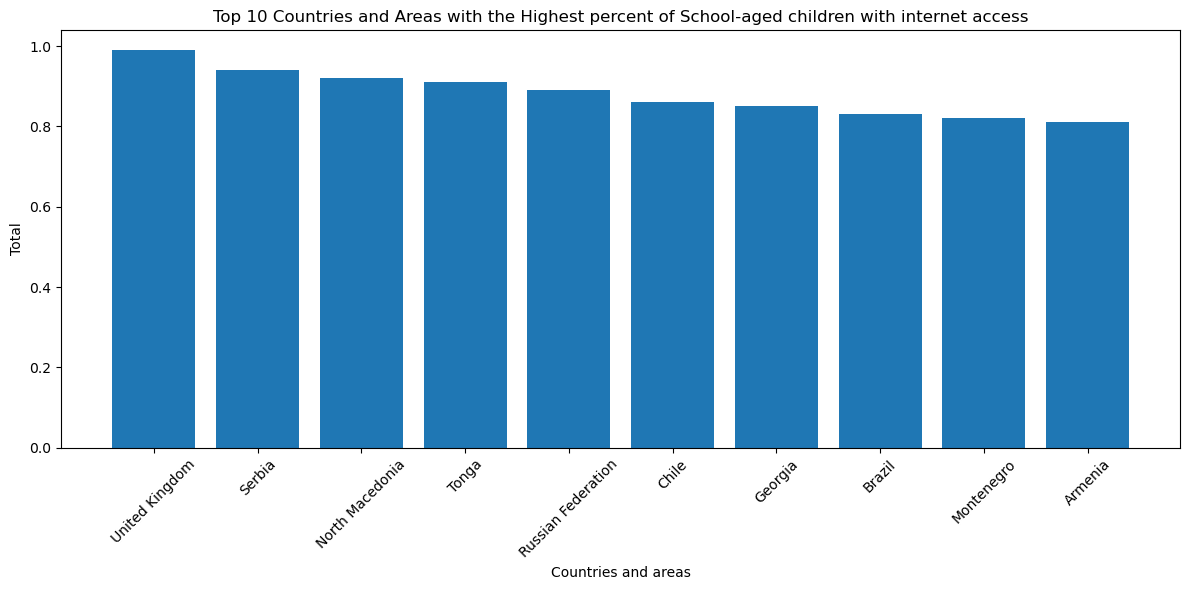

In [42]:


dftest3cleaned2 = dftest3cleaned2.sort_values(by='Total', ascending=False)

#selecting top 10 rows based on their 'Total' value
top_10 = dftest3cleaned2.head(10)

# Bar graph for displaying the top 10 countries with highest total percent of schoolchildren with internet access
plt.figure(figsize=(12, 6))
plt.bar(top_10['Countries and areas'], top_10['Total'])
plt.xlabel('Countries and areas')
plt.ylabel('Total')
plt.title('Top 10 Countries and Areas with the Highest percent of School-aged children with internet access')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


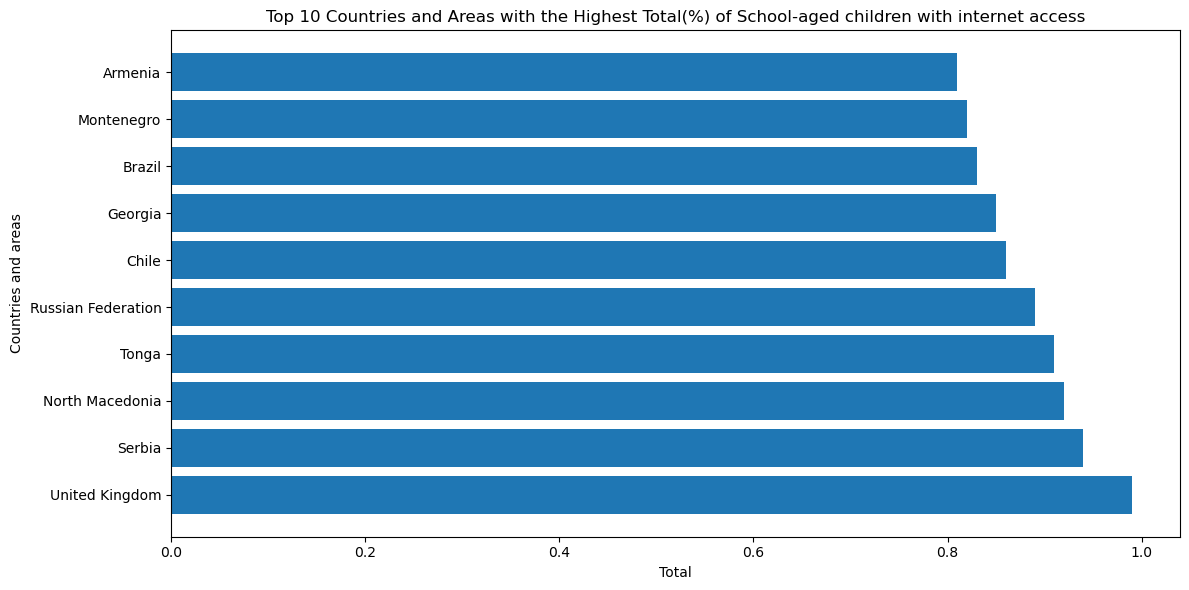

In [43]:
#horizintal version of the above graph
plt.figure(figsize=(12, 6))
plt.barh(top_10['Countries and areas'], top_10['Total'])
plt.xlabel('Total')
plt.ylabel('Countries and areas')
plt.title('Top 10 Countries and Areas with the Highest Total(%) of School-aged children with internet access')
plt.tight_layout()
plt.show()


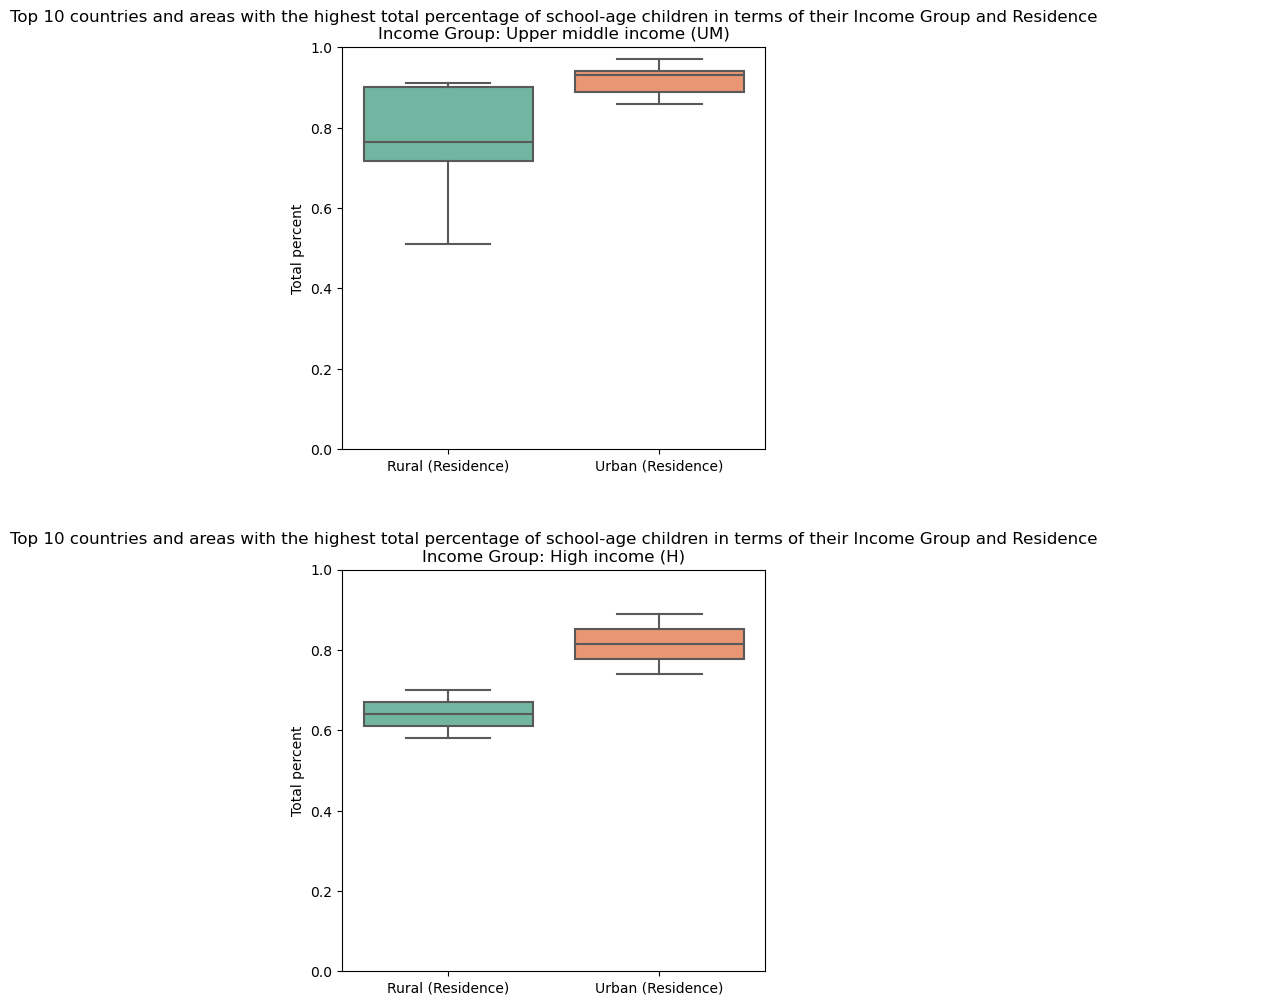

In [44]:
#here, I am visualizing the top 10 countries which I pulled into a dataframe
#and depictted in a bar graph above, but am delineating by the Top 10's Income Groups
#to see the relationship between Income group and the rural versus urban residence 
#in internet connectivitty


dftest3cleaned2 = dftest3cleaned2.sort_values(by='Total', ascending=False)

top_10 = dftest3cleaned2.head(10)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
income_groups = ['Upper middle income (UM)', 'Lower middle income (LM)', 'High income (H)', 'Low income (L)']

for i, income_group in enumerate(income_groups):
    row = i // 2
    col = i % 2

    top_10_income_group = top_10[top_10['Income Group'] == income_group]

    if not top_10_income_group.empty:
        ax = sns.boxplot(data=top_10_income_group[['Rural (Residence)', 'Urban (Residence)']], ax=axes[row, col], palette='Set2')
        ax.set_xticklabels(['Rural (Residence)', 'Urban (Residence)'])
        ax.set_ylabel('Total percent')  
        ax.set_ylim(0, 1)  
        ax.yaxis.grid(False)  
        axes[row, col].set_title(f'Top 10 countries and areas with the highest total percentage of school-age children in terms of their Income Group and Residence\nIncome Group: {income_group}')
    else:
        axes[row, col].set_axis_off()

plt.subplots_adjust(hspace=0.3)  
plt.show()


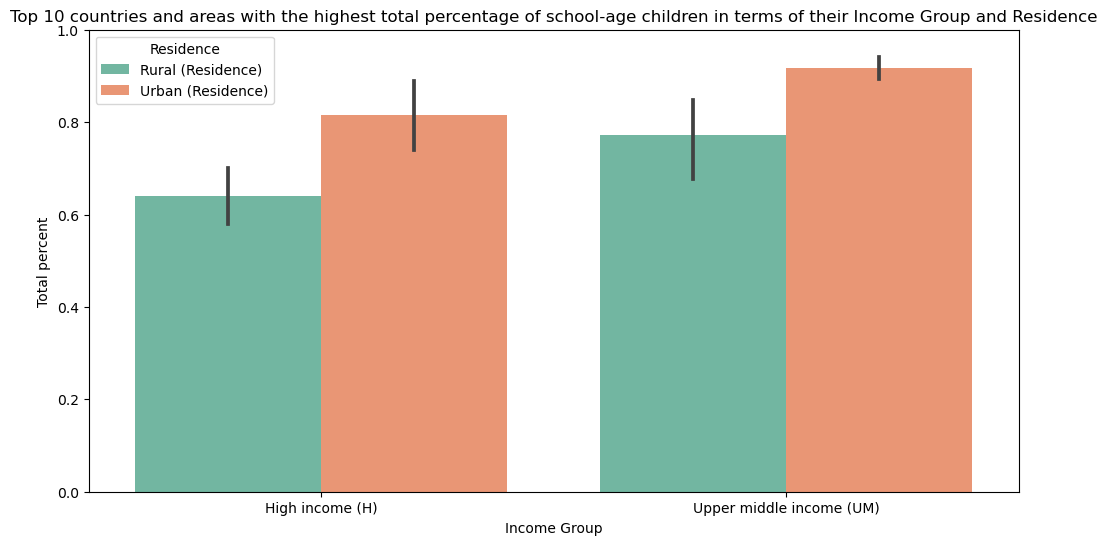

In [45]:
#here, i am separating the bar graphs to be able to visualize the two
#relevant income groups more effectiveely I will create a groupeed Bar plot
#these are visually quite explainable to a viewer and I think that makes it a favorable data
#visualization method


#melting the data to fit into a grouped bar plot
melted_data = pd.melt(top_10, id_vars=['Income Group'], value_vars=['Rural (Residence)', 'Urban (Residence)'], var_name='Residence', value_name='Total percent')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_data, x='Income Group', y='Total percent', hue='Residence', palette='Set2')
plt.title('Top 10 countries and areas with the highest total percentage of school-age children in terms of their Income Group and Residence')
plt.ylabel('Total percent')


ax.set_ylim(0, 1)

plt.show()


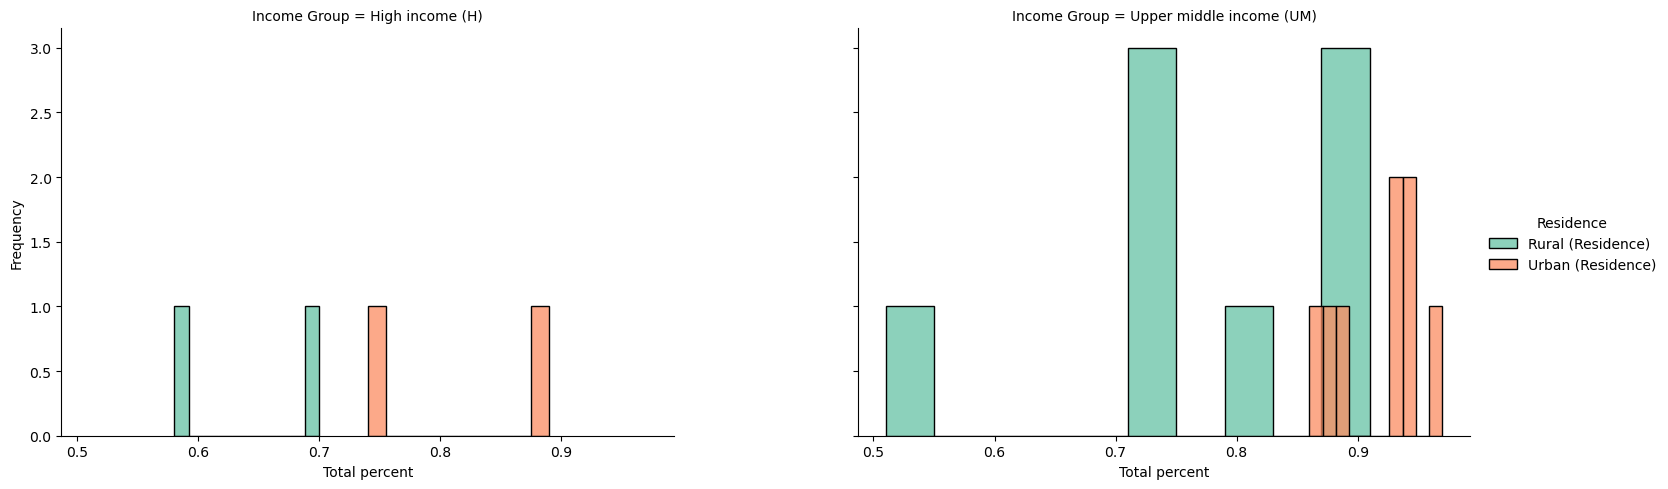

In [46]:

# Here I am Melting the data to have the columns, 'Residence' and 'Total percent'
#however, i am going to be visualizing how many individual values we have per category 
#this is important as it gives a better understanding of what kind of data visualization tool to employ
melted_data = pd.melt(top_10, id_vars=['Income Group'], value_vars=['Rural (Residence)', 'Urban (Residence)'], var_name='Residence', value_name='Total percent')

# Faceted Histogram will help me in grasping how many individual values are present 
#for me to be able to visualize and make inferences with
g = sns.FacetGrid(melted_data, col='Income Group', hue='Residence', palette='Set2', col_wrap=2, height=5, aspect=1.5)
g.map(sns.histplot, 'Total percent', bins=10, alpha=0.75)
g.add_legend(title='Residence')
g.set_axis_labels('Total percent', 'Frequency')
g.fig.subplots_adjust(wspace=0.3, hspace=0.3)  
plt.show()


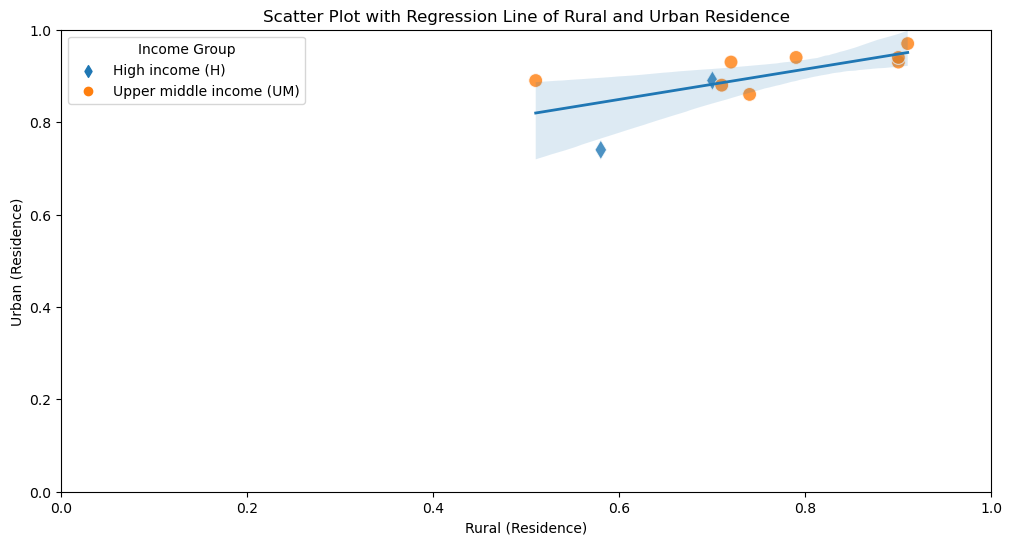

In [47]:
#Here I want to visualize the relationship between the urban and rural residence
#with a Scatter plot

plt.figure(figsize=(12, 6))

#First I am going to define markers for each income group
markers = {'Upper middle income (UM)': 'o', 'Lower middle income (LM)': 's', 'High income (H)': 'd', 'Low income (L)': 'P'}


sns.scatterplot(x='Rural (Residence)', y='Urban (Residence)', hue='Income Group', data=top_10, s=100, style='Income Group', markers=markers, alpha=0.8)

# This regression line will help in visualizing the relationship between urban and rural residences
sns.regplot(x='Rural (Residence)', y='Urban (Residence)', data=top_10, scatter=False, line_kws={'linewidth': 2})

plt.title('Scatter Plot with Regression Line of Rural and Urban Residence')
plt.xlabel('Rural (Residence)')
plt.ylabel('Urban (Residence)')

# Here, i am setting the y-axis range from 0 to 1 so that we see the clear spread across all 
#percentages, in the next cell, I will zoom into the relevant section of this scatter plot to 
#examine the relationship in more detail
plt.ylim(0, 1)
plt.xlim(0,1)

plt.legend(title='Income Group', loc='upper left')

plt.show()


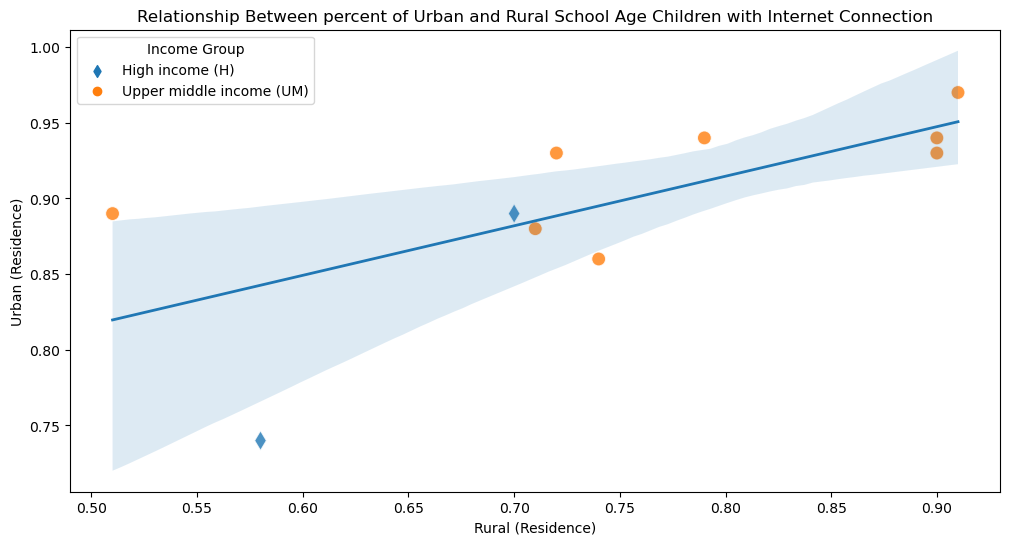

In [48]:
#zoomed in scatter plot
#given that the previous scatter plot gave a birds eye view of the data, It prompts
#a zoomed in view of the data as well

plt.figure(figsize=(12, 6))

#First I am going to define markers for each income group
markers = {'Upper middle income (UM)': 'o', 'Lower middle income (LM)': 's', 'High income (H)': 'd', 'Low income (L)': 'P'}

sns.scatterplot(x='Rural (Residence)', y='Urban (Residence)', hue='Income Group', data=top_10, s=100, style='Income Group', markers=markers, alpha=0.8)

# This regression line will help in visualizing the relationship between urban and rural residences
#given that this graph will be zoomed in, it will be easier to make inferences 
sns.regplot(x='Rural (Residence)', y='Urban (Residence)', data=top_10, scatter=False, line_kws={'linewidth': 2})

plt.title('Relationship Between percent of Urban and Rural School Age Children with Internet Connection')
plt.xlabel('Rural (Residence)')
plt.ylabel('Urban (Residence)')

plt.legend(title='Income Group', loc='upper left')

plt.show()


# Task 2.3: Preparing Secondary.csv data for comparative analysis with cleaned Primary.csv data
In this part, I am cleaning Secondary.csv's data and handling the anomalies so that I can compare the results to the Primary.csv data to see if the results mirror their respective regions

In [49]:
#cleaning Secondary.csv
file_path_test2 = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/Secondary.csv'
dftest2 = pd.read_csv(file_path_test2, skiprows=1)
output_file_path_test2 = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/cleaned_secondary_task3_1.csv'
dftest2.to_csv(output_file_path_test2, index=False)
dftest2.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,AGOA,Angola,SSA,ESA,Lower middle income (LM),24%,2%,33%,0%,69%,Demographic and Health Survey,2015-16
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),45%,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),85%,78%,91%,54%,100%,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),42%,38%,57%,13%,79%,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),76%,76%,76%,4%,100%,Multiple Indicator Cluster Survey,2012


In [50]:
#converting the data in the 'Total' column to numeric to enable analysis

def percentage_to_float(value):
    if isinstance(value, str) and value.endswith('%'):
        return float(value[:-1]) / 100
    else:
        return value

columns_to_convert = ['Total']

for column in columns_to_convert:
    dftest2[column] = dftest2[column].apply(percentage_to_float)

dftest2.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
0,AGOA,Angola,SSA,ESA,Lower middle income (LM),0.24,2%,33%,0%,69%,Demographic and Health Survey,2015-16
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.45,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.85,78%,91%,54%,100%,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.42,38%,57%,13%,79%,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.76,76%,76%,4%,100%,Multiple Indicator Cluster Survey,2012


In [51]:
columns_to_remove2 = ['Rural (Residence)','Urban (Residence)','Poorest (Wealth quintile)', 'Richest (Wealth quintile)', 'Data source', 'Time period']
dftest2 = dftest2.drop(columns=columns_to_remove2)
dftest2.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGOA,Angola,SSA,ESA,Lower middle income (LM),0.24
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.45
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.85
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.42
4,BRB,Barbados,LAC,LAC,High income (H),0.76


In [52]:
output_file_path2 = '/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/cleanedsecondarytask3.csv'
dftest2.to_csv(output_file_path2, index=False)

In [53]:
dftest.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.39
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34
4,BRB,Barbados,LAC,LAC,High income (H),0.63


In [54]:
dftest2.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGOA,Angola,SSA,ESA,Lower middle income (LM),0.24
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.45
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.85
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.42
4,BRB,Barbados,LAC,LAC,High income (H),0.76


In [55]:
dftesttask3 = dftest[dftest['Income Group'] == 'Lower middle income (LM)']
dftesttask3.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34
6,BOL,Bolivia (Plurinational State of),LAC,LAC,Lower middle income (LM),0.11
11,CMR,Cameroon,SSA,WCA,Lower middle income (LM),0.04
18,CIV,C™te d'Ivoire,SSA,WCA,Lower middle income (LM),0.02


In [56]:
dftest2task3 = dftest2[dftest2['Income Group'] == 'Lower middle income (LM)']

dftest2task3.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGOA,Angola,SSA,ESA,Lower middle income (LM),0.24
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.42
10,CMR,Cameroon,SSA,WCA,Lower middle income (LM),0.07
17,CIV,C™te d'Ivoire,SSA,WCA,Lower middle income (LM),0.03
20,DJI,Djibouti,SSA,ESA,Lower middle income (LM),0.09


In [57]:
file_path_primarylm_task3 = "/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/primarylmdf.csv"

dftesttask3.to_csv(file_path_primarylm_task3, index=False)


In [58]:
file_path_secondarylm_task3 = "/Users/amayiyer/Desktop/DatSci_Python/s3970066/Assignment1_DataSciWithPython_s3970066/Global database on school-age digital connectivity-Corrected/secondarylmdf.csv"

dftest2task3.to_csv(file_path_secondarylm_task3, index=False)

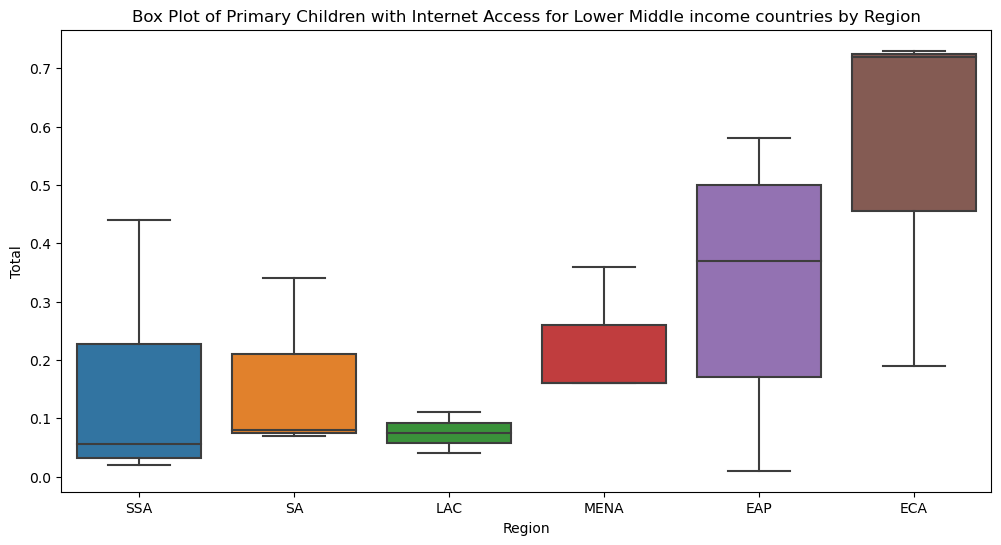

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total', data=dftesttask3)
plt.title('Box Plot of Primary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()

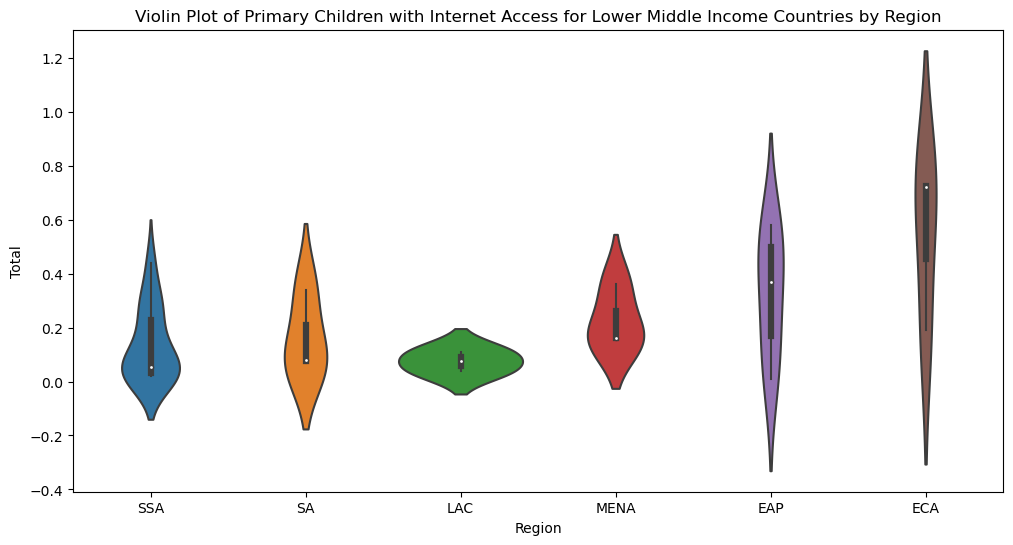

In [60]:

plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Total', data=dftesttask3)
plt.title('Violin Plot of Primary Children with Internet Access for Lower Middle Income Countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()


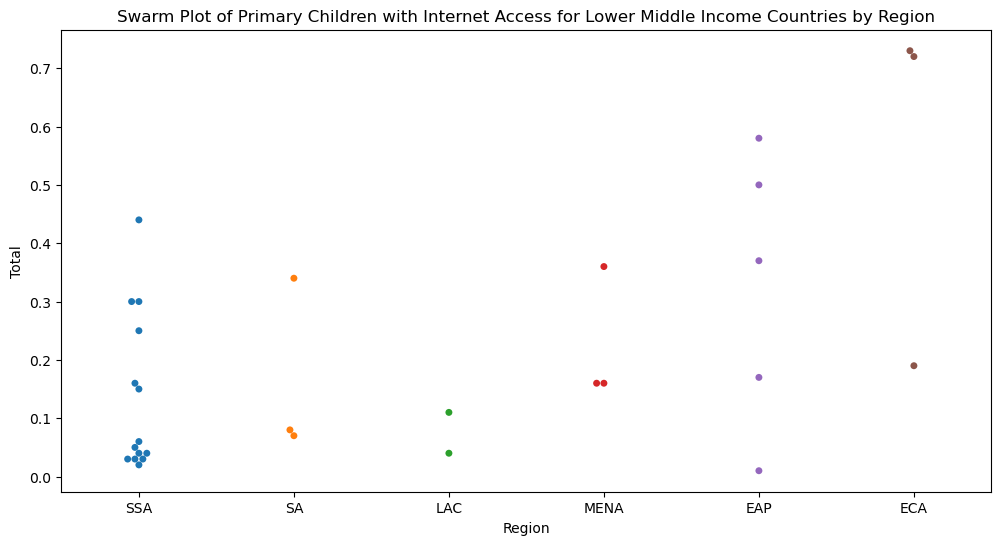

In [61]:

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Region', y='Total', data=dftesttask3)
plt.title('Swarm Plot of Primary Children with Internet Access for Lower Middle Income Countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()


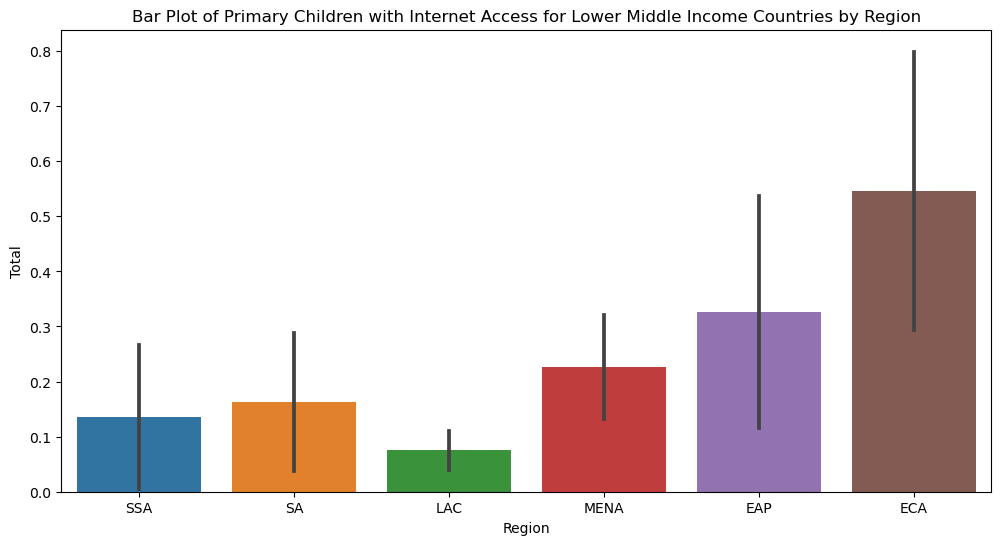

In [62]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total', data=dftesttask3, ci='sd')
plt.title('Bar Plot of Primary Children with Internet Access for Lower Middle Income Countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()


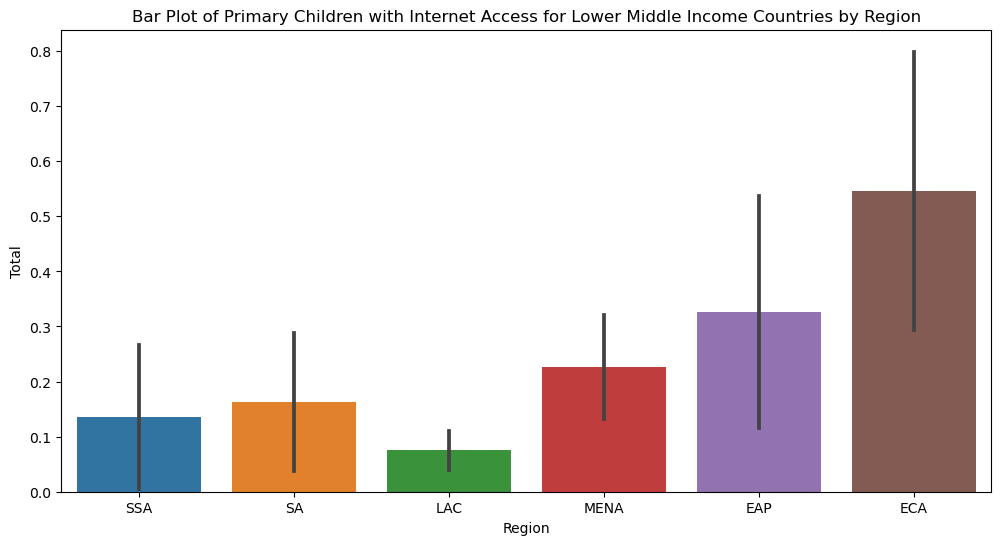

In [63]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total', data=dftesttask3, ci='sd')
plt.title('Bar Plot of Primary Children with Internet Access for Lower Middle Income Countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()


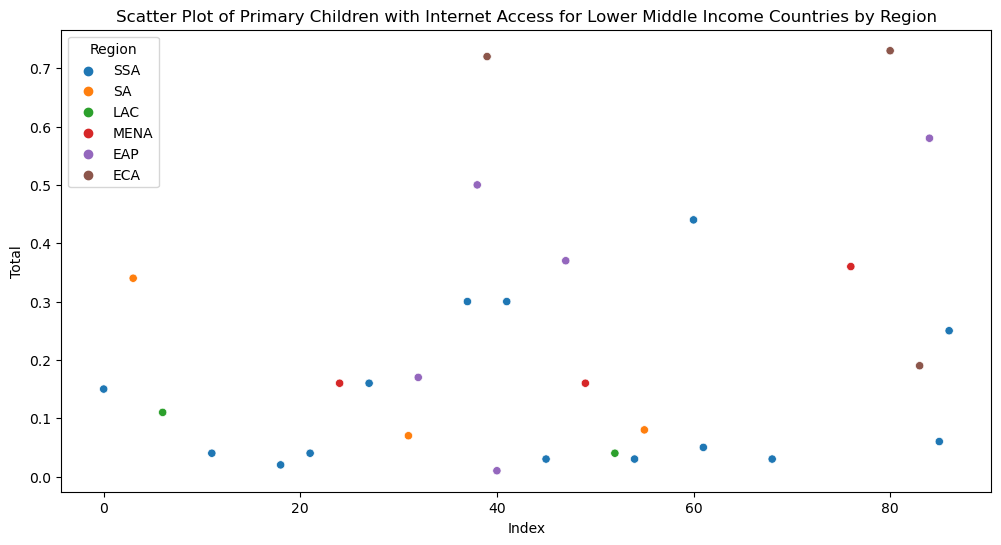

In [64]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x=dftesttask3.index, y='Total', hue='Region', data=dftesttask3)
plt.title('Scatter Plot of Primary Children with Internet Access for Lower Middle Income Countries by Region')
plt.xlabel('Index')
plt.ylabel('Total')
plt.show()


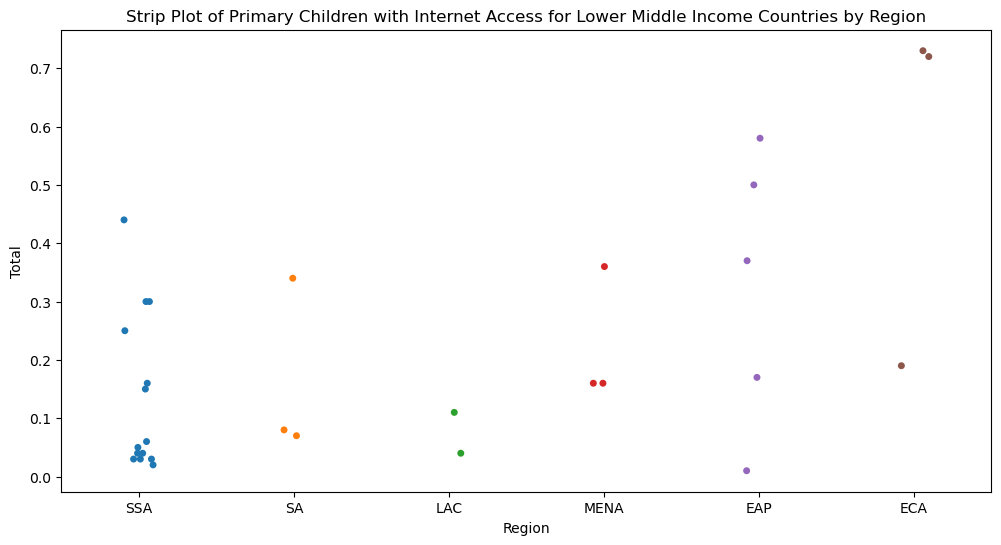

In [65]:

plt.figure(figsize=(12, 6))
sns.stripplot(x='Region', y='Total', data=dftesttask3, jitter=True)
plt.title('Strip Plot of Primary Children with Internet Access for Lower Middle Income Countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()



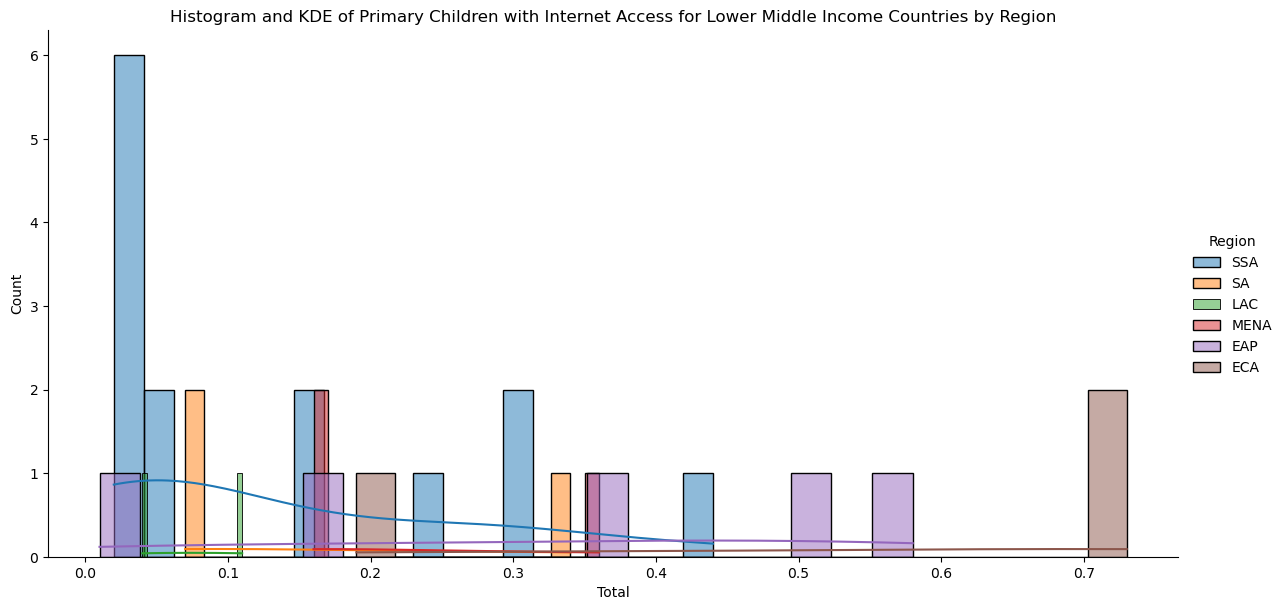

In [66]:
#I am visualizing the following data in a Faceted histogram to get an idea of how many
#regions in the datasets have a low % of internet connectivity

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(dftesttask3, hue='Region', height=6, aspect=2)
g.map(sns.histplot, 'Total', kde=True, bins=20)
g.add_legend()
plt.title('Histogram and KDE of Primary Children with Internet Access for Lower Middle Income Countries by Region')
plt.xlabel('Total')
plt.show()


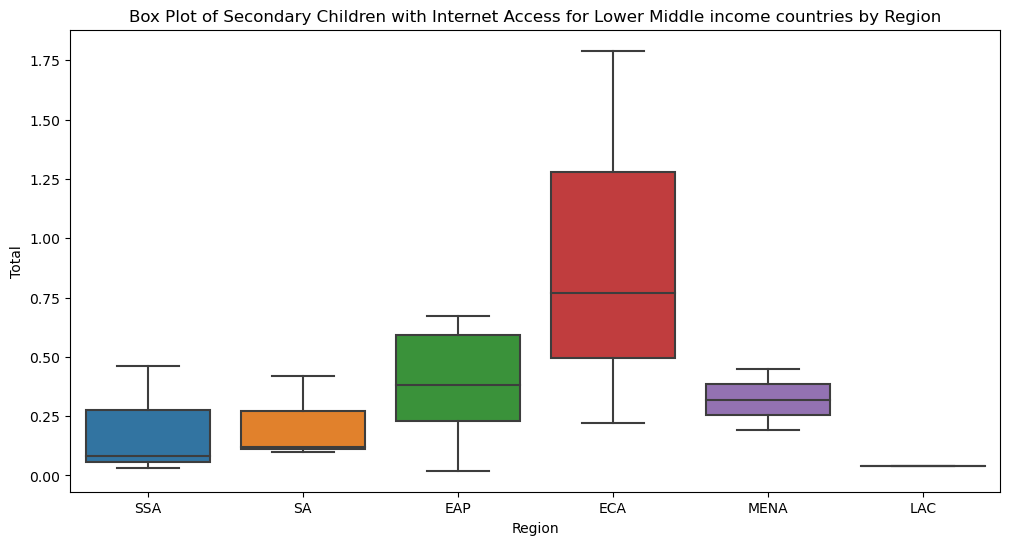

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total', data=dftest2task3)
plt.title('Box Plot of Secondary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.show()

In [68]:
dftest2task3.head(50)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGOA,Angola,SSA,ESA,Lower middle income (LM),0.24
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.42
10,CMR,Cameroon,SSA,WCA,Lower middle income (LM),0.07
17,CIV,C™te d'Ivoire,SSA,WCA,Lower middle income (LM),0.03
20,DJI,Djibouti,SSA,ESA,Lower middle income (LM),0.09
24,GHA,Ghana,SSA,WCA,Lower middle income (LM),0.20
28,IND,India,SA,SA,Lower middle income (LM),0.12
29,IDN,Indonesia,EAP,EAP,Lower middle income (LM),0.23
34,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.39
35,KIR,Kiribati,EAP,EAP,Lower middle income (LM),0.59


In [69]:
#because of Ukraine's total value being over 1, I am handling the anomaly by 
#making it 0.79, along with this, I will also handle other similarly anomalous values in the column
#although Ukraine is the only main anomaly here

def adjust_total(value):
    if value < 0:
        return -value
    elif value > 1:
        return value - int(value)
    else:
        return value


dftest2task3['Total'] = dftest2task3['Total'].apply(adjust_total)


dftest2task3.head(50)

/var/folders/8y/9bzf6lrd1kggm5429dypyz2r0000gn/T/ipykernel_40815/3478238393.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest2task3['Total'] = dftest2task3['Total'].apply(adjust_total)


,ISO3,Countries and areas,Region,Sub-region,Income Group,Total
0,AGOA,Angola,SSA,ESA,Lower middle income (LM),0.24
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.42
10,CMR,Cameroon,SSA,WCA,Lower middle income (LM),0.07
17,CIV,C™te d'Ivoire,SSA,WCA,Lower middle income (LM),0.03
20,DJI,Djibouti,SSA,ESA,Lower middle income (LM),0.09
24,GHA,Ghana,SSA,WCA,Lower middle income (LM),0.20
28,IND,India,SA,SA,Lower middle income (LM),0.12
29,IDN,Indonesia,EAP,EAP,Lower middle income (LM),0.23
34,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.39
35,KIR,Kiribati,EAP,EAP,Lower middle income (LM),0.59


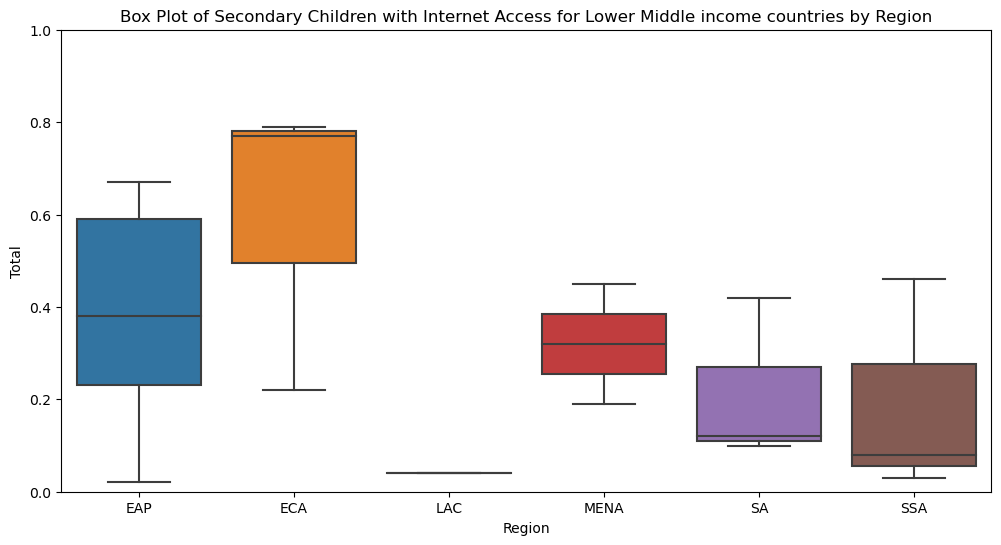

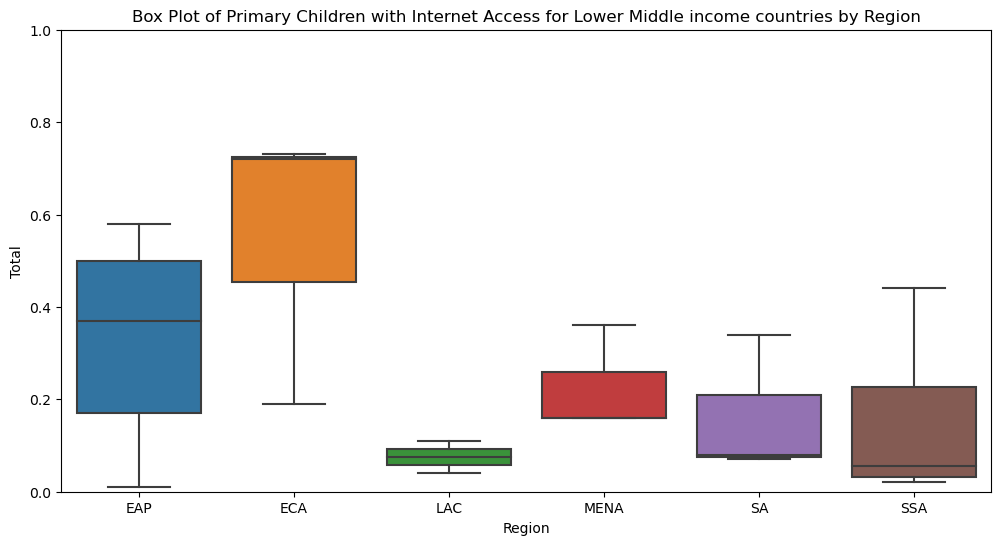

In [70]:
#the next few graphs will consist of a similar pattern as I just want to
#visualize them in as many ways possible
region_order = ['EAP', 'ECA', 'LAC', 'MENA', 'SA', 'SSA']

plt.figure(figsize=(12, 6))
ax1 = sns.boxplot(x='Region', y='Total', data=dftest2task3, order=region_order)
plt.title('Box Plot of Secondary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax1.set_ylim(0, 1)

plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.boxplot(x='Region', y='Total', data=dftesttask3, order=region_order)
plt.title('Box Plot of Primary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax2.set_ylim(0, 1)

plt.show()


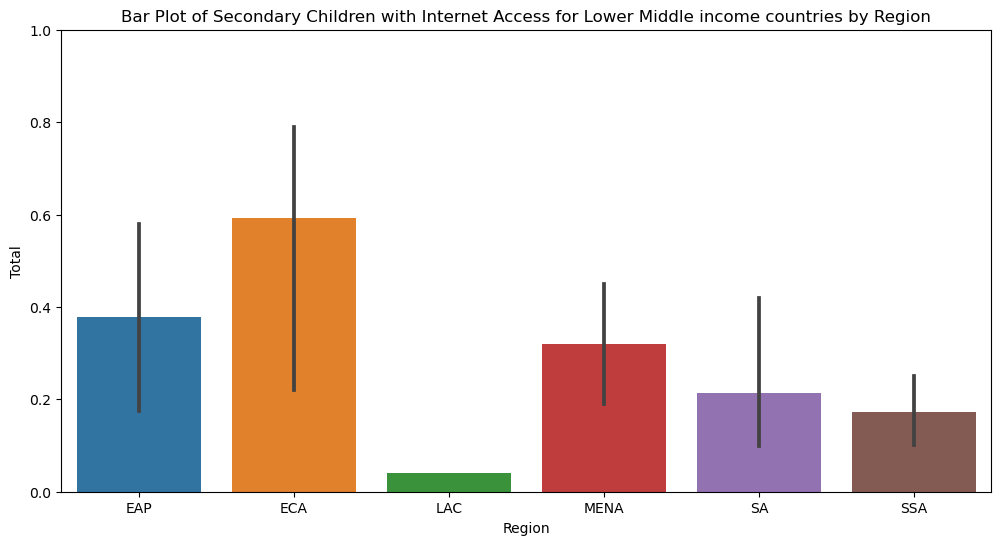

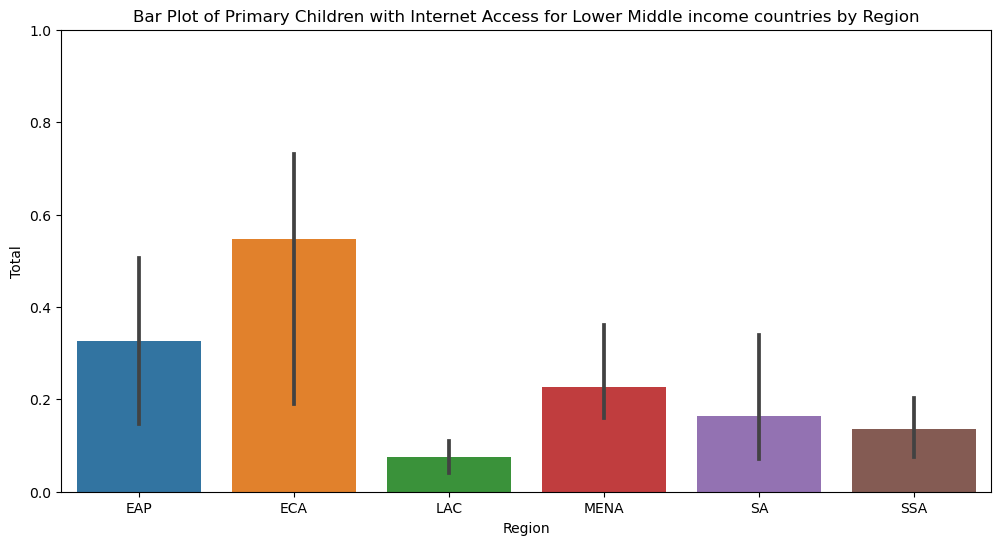

In [71]:
region_order = ['EAP', 'ECA', 'LAC', 'MENA', 'SA', 'SSA']

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='Region', y='Total', data=dftest2task3, order=region_order)
plt.title('Bar Plot of Secondary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax1.set_ylim(0, 1)

plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='Region', y='Total', data=dftesttask3, order=region_order)
plt.title('Bar Plot of Primary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax2.set_ylim(0, 1)

plt.show()


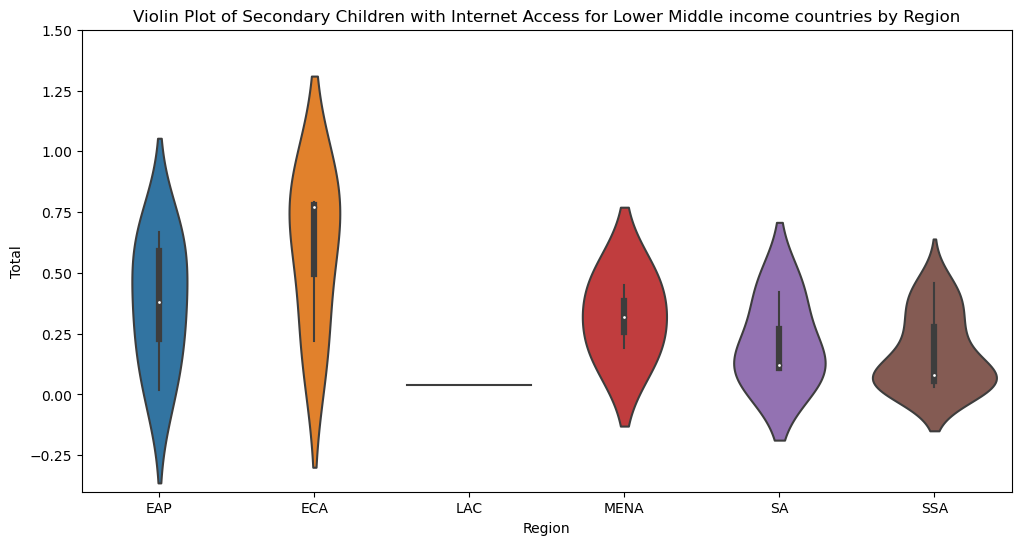

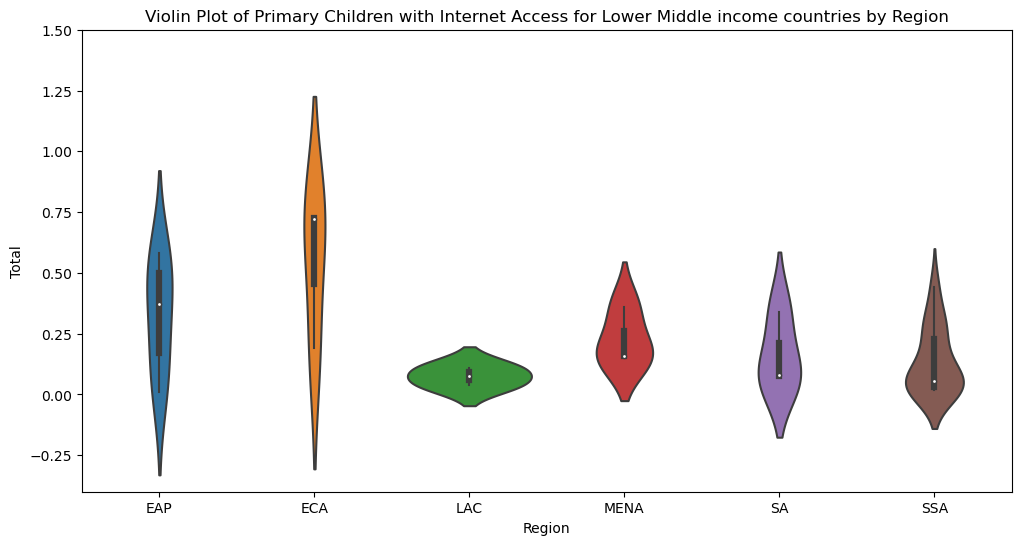

In [72]:
region_order = ['EAP', 'ECA', 'LAC', 'MENA', 'SA', 'SSA']

plt.figure(figsize=(12, 6))
ax1 = sns.violinplot(x='Region', y='Total', data=dftest2task3, order=region_order)
plt.title('Violin Plot of Secondary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax1.set_ylim(-0.4, 1.5)

plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.violinplot(x='Region', y='Total', data=dftesttask3, order=region_order)
plt.title('Violin Plot of Primary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax2.set_ylim(-0.4, 1.5)

plt.show()


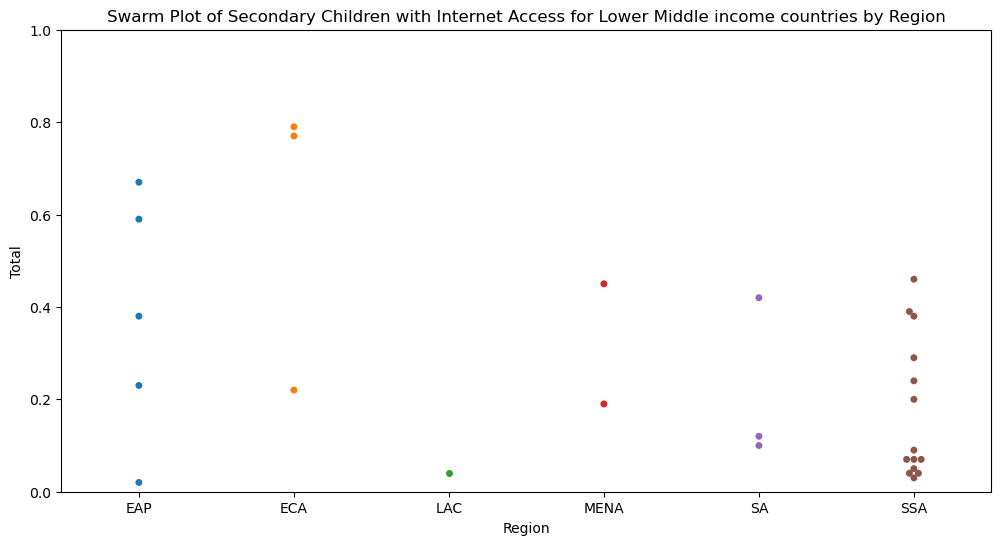

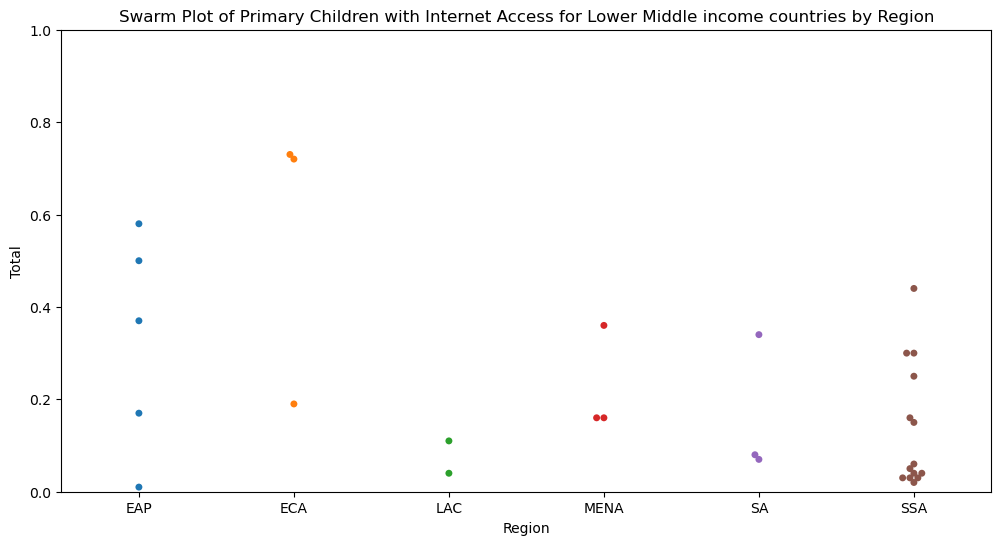

In [73]:

region_order = ['EAP', 'ECA', 'LAC', 'MENA', 'SA', 'SSA']

plt.figure(figsize=(12, 6))
ax1 = sns.swarmplot(x='Region', y='Total', data=dftest2task3, order=region_order)
plt.title('Swarm Plot of Secondary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax1.set_ylim(0, 1)

plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.swarmplot(x='Region', y='Total', data=dftesttask3, order=region_order)
plt.title('Swarm Plot of Primary Children with Internet Access for Lower Middle income countries by Region')
plt.xlabel('Region')
plt.ylabel('Total')

ax2.set_ylim(0, 1)

plt.show()
